## Customer Churn Prediction

### 1.Problem Statement

Over the last few quarters, Bank XYZ has seen a significant number of clients close their accounts or migrate to other institutions. As a result, quarterly revenues have suffered significantly and yearly revenues for the current fiscal year may suffer significantly, leading stocks to fall and market cap to fall by X%.

<b>Objective:</b>Can we construct a model that predicts consumers who will churn in the near future with reasonable accuracy? 

<b>Definition of churn:</b>A customer having closed all their active accounts with the bank is said to have churned. Churn can be defined in other ways as well, based on the context of the problem. A customer not transacting for 6 months or 1 year can also be defined as to have churned, based on the business requirements

### 2.Mapping the real world problem to an ML problem

<h4> 2.1.Type of Machine Learning Problem </h4>

<p> It is a binary classification problem, for a given data of customer we need to predict if a customer churns or not</p>

<h4>2.2.Performance Metric </h4>

Metric(s): 
* <b>Business metrics</b> : Churn rate (month-on-month, weekly/quarterly), Trend of avg. number of products per customer, 
%age of dormant customers, Other such descriptive metrics
    
* <b>Data-related metrics</b> : F1-score, Recall, Precision
    <p>Recall = TP/(TP + FN) 
    <p>Precision = TP/(TP + FP)
    <p>F1-score = Harmonic mean of Recall and Precision
    <p>where, TP = True Positive, FP = False Positive and FN = False Negative

### 3.Setting the target/goal for the metrics?

* ML-related metrics :
    - Recall : >70%
    - Precision : >70%
    - F1-score : >70%


* Business metrics : Usually, it's top down. But a good practice is to consider it to make atleast half the impact of the data science metric. For e.g., If we take Recall target as __70%__ which means correctly identifying 70% of customers who's going to churn in the near future, we can expect that due to business intervention (offers, getting in touch with customers etc.), 50% of the customers can be saved from being churned, which means atleast a __35%__ improvement in Churn Rate

In [1]:
## Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [2]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all 
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
## Reading the dataset
df = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/360/Churn_Modelling.csv")

In [5]:
df.shape

(10000, 14)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Basic EDA

In [7]:
df.describe() # Describe all numerical columns
df.describe(include = ['O']) # Describe all non-numerical/categorical columns

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
## Checking number of unique customers in the dataset
df.shape[0], df.CustomerId.nunique()

(10000, 10000)

Number of customers belongs to category 0  7963 , ( 79.63 %)
Number of customers belongs to category 1  2037 , ( 20.369999999999997 %)


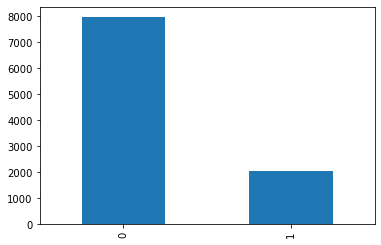

In [15]:
df['Exited'].value_counts().plot(kind='bar')
y_value_counts = df['Exited'].value_counts()
print("Number of customers belongs to category 0 ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of customers belongs to category 1 ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

### Observation

<p>1.Target class has two class label 0 and 1</p>
<p>2.Dataset is imbalance with majority of data(~80%) belong to category 0</p>

In [9]:
df_t = df.groupby(['Surname']).agg({'RowNumber':'count', 'Exited':'mean'}
                                  ).reset_index().sort_values(by='RowNumber', ascending=False)

In [10]:
df_t.head()

,Surname,RowNumber,Exited
2473,Smith,32,0.281250
1689,Martin,29,0.310345
2389,Scott,29,0.103448
2751,Walker,28,0.142857
336,Brown,26,0.192308


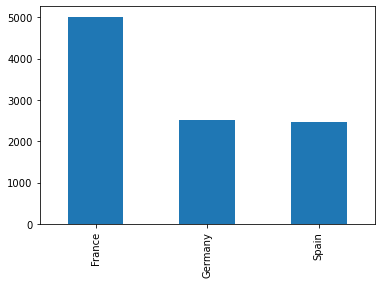

In [13]:
df['Geography'].value_counts().plot(kind='bar')

## Seperating out columns into various categories

In [16]:
target_var = ['Exited']
cols_to_remove = ['RowNumber', 'CustomerId']
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_feats = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [17]:
## Separating out target variable and removing the non-essential columns
y = df[target_var].values
df.drop(cols_to_remove, axis=1, inplace=True)

## Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
df_train_val, df_test, y_train_val, y_test= train_test_split(df, y, test_size=0.1, stratify=y,random_state=40)
df_train, df_val, y_train, y_val = train_test_split(df_train_val, y_train_val, test_size = 0.12, random_state = 42)

In [19]:
print('Number of data points in train data:', df_train.shape)
print('Number of data points in cross validation data:', df_val.shape)
print('Number of data points in test data:', df_test.shape)

Number of data points in train data: (7920, 12)
Number of data points in cross validation data: (1080, 12)
Number of data points in test data: (1000, 12)


In [20]:
df_train.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2094,Kapustina,531,Spain,Male,70,1,0.00,2,0,0,99503.19,0
4960,Carpenter,811,France,Male,42,10,0.00,2,1,1,3797.79,0
5055,Briggs,739,Spain,Male,31,1,0.00,2,1,1,58469.75,0
1747,Yudina,586,Germany,Male,34,9,74309.81,1,1,0,15034.93,0
9351,Golubev,718,Germany,Male,63,7,123204.88,1,1,1,100538.80,0


## Univariate Analysis on Training data Set

Text(0.5, 1.05, 'Box Plot of customer_CreditScore')

Text(0.5, 1.05, "PDF of feature 'CreditScore'")

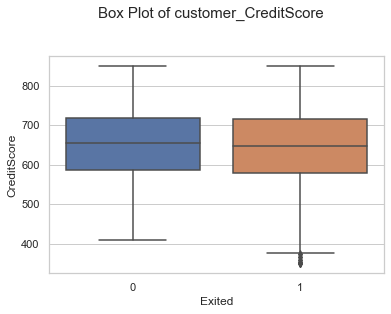

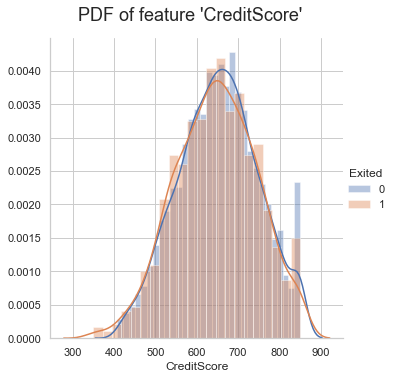

In [24]:
sns.boxplot(x='Exited',y='CreditScore', data=df_train)
plt.suptitle("Box Plot of customer_CreditScore", y=1.05, fontsize =15)
sns.FacetGrid(df_train, hue="Exited", height=5) \
   .map(sns.distplot, "CreditScore") \
   .add_legend();
plt.suptitle("PDF of feature 'CreditScore'", y=1.05, fontsize=18)
plt.show()

Text(0.5, 1.05, 'Box Plot of customer_Age')

Text(0.5, 1.05, "PDF of feature 'Age'")

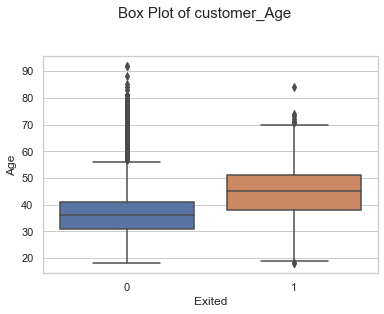

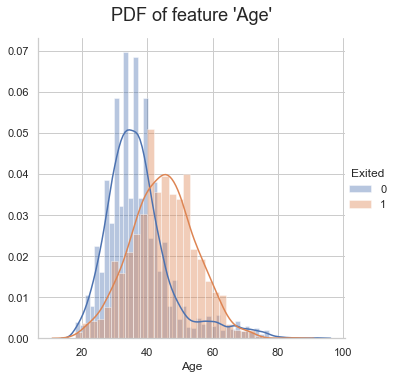

In [25]:
sns.boxplot(x='Exited',y='Age', data=df_train)
plt.suptitle("Box Plot of customer_Age", y=1.05, fontsize =15)
sns.FacetGrid(df_train, hue="Exited", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.suptitle("PDF of feature 'Age'", y=1.05, fontsize=18)
plt.show()

Text(0.5, 1.05, 'Box Plot of customer_Tenure')

Text(0.5, 1.05, "PDF of feature 'Tenure'")

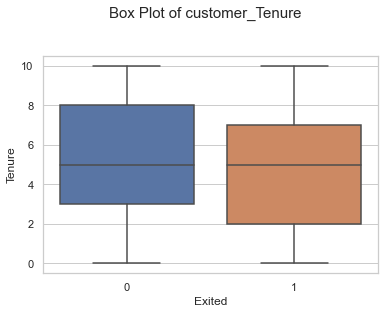

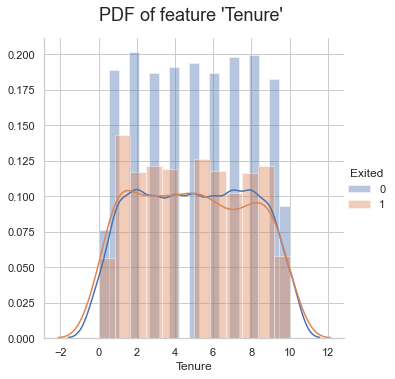

In [26]:
sns.boxplot(x='Exited',y='Tenure', data=df_train)
plt.suptitle("Box Plot of customer_Tenure", y=1.05, fontsize =15)
sns.FacetGrid(df_train, hue="Exited", height=5) \
   .map(sns.distplot, "Tenure") \
   .add_legend();
plt.suptitle("PDF of feature 'Tenure'", y=1.05, fontsize=18)
plt.show()

Text(0.5, 1.05, 'Box Plot of customer_Balance')

Text(0.5, 1.05, "PDF of feature 'Balance'")

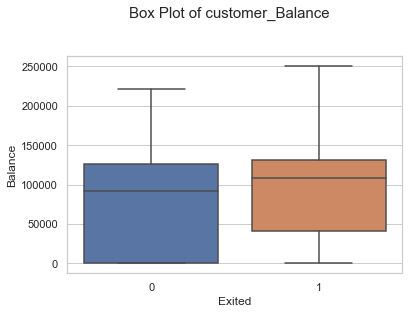

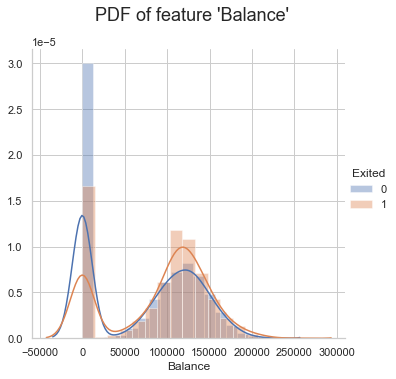

In [27]:
sns.boxplot(x='Exited',y='Balance', data=df_train)
plt.suptitle("Box Plot of customer_Balance", y=1.05, fontsize =15)
sns.FacetGrid(df_train, hue="Exited", height=5) \
   .map(sns.distplot, "Balance") \
   .add_legend();
plt.suptitle("PDF of feature 'Balance'", y=1.05, fontsize=18)
plt.show()

Text(0.5, 1.05, 'Box Plot of customer_EstimatedSalary')

Text(0.5, 1.05, "PDF of feature 'EstimatedSalary'")

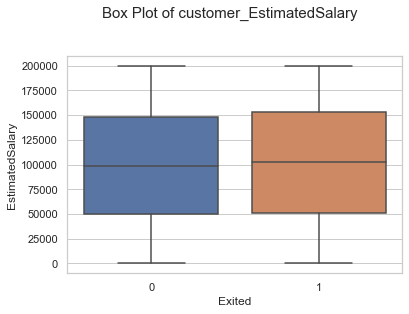

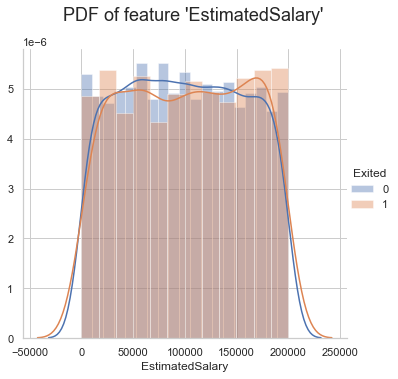

In [32]:
sns.boxplot(x='Exited',y='EstimatedSalary', data=df_train)
plt.suptitle("Box Plot of customer_EstimatedSalary", y=1.05, fontsize =15)
sns.FacetGrid(df_train, hue="Exited", height=5) \
   .map(sns.distplot, "EstimatedSalary") \
   .add_legend();
plt.suptitle("PDF of feature 'EstimatedSalary'", y=1.05, fontsize=18)
plt.show()

### Observations

 - From the univariate plots, we get an indication that _EstimatedSalary_ , being uniformly distributed, might not turn out to be an important predictor 
 - Similarly, for _NumOfProducts_ , there are predominantly only two values (1 and 2). Hence, its chances of being a strong predictor is also very unlikely
 - On the other hand, _Balance_ has a multi-modal distribution. We'll see a little later if that helps in separation of the two target classes
 - Age distribution is quite seperable so it might turn out to be an important predictor

In [28]:
df_train['NumOfProducts'].value_counts()

1    4031
2    3631
3     209
4      49
Name: NumOfProducts, dtype: int64

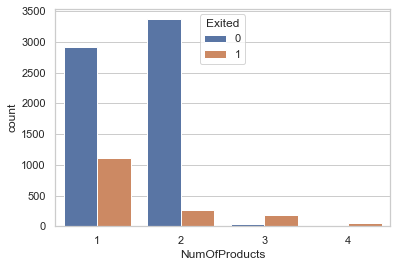

In [31]:
sns.countplot(data=df_train, x="NumOfProducts", hue="Exited")

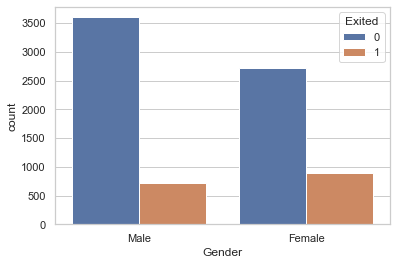

In [33]:
sns.countplot(data=df_train, x="Gender", hue="Exited")

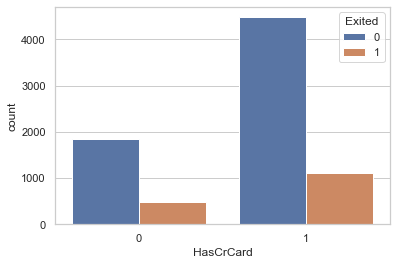

In [34]:
sns.countplot(data=df_train, x="HasCrCard", hue="Exited")

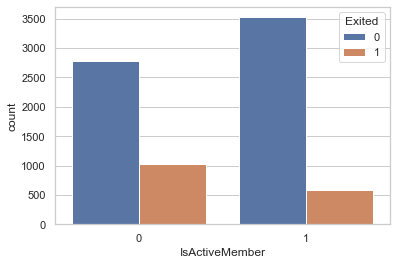

In [35]:
sns.countplot(data=df_train, x="IsActiveMember", hue="Exited")

## Bivariate Analysis

In [37]:
## Check linear correlation (rho) between individual features and the target variable
corr = df_train.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.005999,-0.003585,0.008407,0.015003,-0.000202,0.022003,-0.001661,-0.025467
Age,-0.005999,1.000000,-0.013447,0.021654,-0.024590,-0.013021,0.085991,-0.004166,0.282362
Tenure,-0.003585,-0.013447,1.000000,-0.021156,0.013485,0.028171,-0.029890,0.011724,-0.019099
Balance,0.008407,0.021654,-0.021156,1.000000,-0.302182,-0.015554,-0.011648,0.016336,0.117298
NumOfProducts,0.015003,-0.024590,0.013485,-0.302182,1.000000,0.001324,0.013072,0.013014,-0.046052
HasCrCard,-0.000202,-0.013021,0.028171,-0.015554,0.001324,1.000000,0.000363,-0.000087,-0.012170
IsActiveMember,0.022003,0.085991,-0.029890,-0.011648,0.013072,0.000363,1.000000,-0.011809,-0.158500
EstimatedSalary,-0.001661,-0.004166,0.011724,0.016336,0.013014,-0.000087,-0.011809,1.000000,0.015761
Exited,-0.025467,0.282362,-0.019099,0.117298,-0.046052,-0.012170,-0.158500,0.015761,1.000000


<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

[Text(0.5, 0, 'CreditScore'),
 Text(1.5, 0, 'Age'),
 Text(2.5, 0, 'Tenure'),
 Text(3.5, 0, 'Balance'),
 Text(4.5, 0, 'NumOfProducts'),
 Text(5.5, 0, 'HasCrCard'),
 Text(6.5, 0, 'IsActiveMember'),
 Text(7.5, 0, 'EstimatedSalary'),
 Text(8.5, 0, 'Exited')]

[Text(0, 0.5, 'CreditScore'),
 Text(0, 1.5, 'Age'),
 Text(0, 2.5, 'Tenure'),
 Text(0, 3.5, 'Balance'),
 Text(0, 4.5, 'NumOfProducts'),
 Text(0, 5.5, 'HasCrCard'),
 Text(0, 6.5, 'IsActiveMember'),
 Text(0, 7.5, 'EstimatedSalary'),
 Text(0, 8.5, 'Exited')]

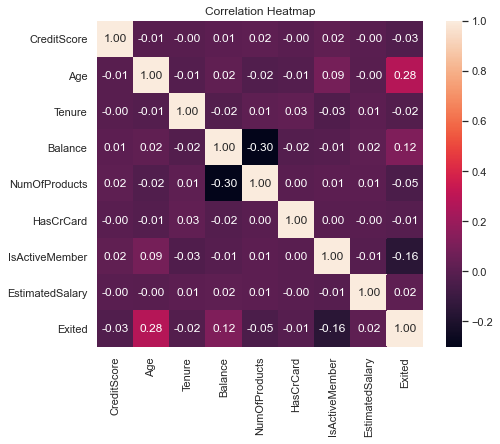

In [38]:
# Create correlation matrix
corr_matrix = df_train.corr()
# Create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show() 

None of the features are highly correlated with the target variable. But some of them have slight linear associations with the target variable.

* Continuous features - Age, Balance 

In [41]:
# Check association of categorical features with target variable
cat_vars_bv = ['Gender', 'IsActiveMember', 'Geography','HasCrCard']
#if there is high diff in mean churn then that class will help in determining churn
for col in cat_vars_bv:
    df_train.groupby([col]).Exited.mean()

Gender
Female    0.248058
Male      0.165663
Name: Exited, dtype: float64

IsActiveMember
0    0.269342
1    0.141709
Name: Exited, dtype: float64

Geography
France     0.160549
Germany    0.326797
Spain      0.164071
Name: Exited, dtype: float64

HasCrCard
0    0.210753
1    0.200000
Name: Exited, dtype: float64

## Missing values and outlier treatment

In [36]:
count = df_train.isnull().sum().sort_values(ascending=False)
percentage = ((df_train.isnull().sum()/len(df_train)*100)).sort_values(ascending=False)
missing_values = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values for all the columns')
missing_values

Count and percentage of missing values for all the columns


,Count,Percentage
Exited,0,0.0
EstimatedSalary,0,0.0
IsActiveMember,0,0.0
HasCrCard,0,0.0
NumOfProducts,0,0.0
Balance,0,0.0
Tenure,0,0.0
Age,0,0.0
Gender,0,0.0
Geography,0,0.0


In [ ]:
# Based on univariate analysis not outlier

## Featurization - Feature Encoding

## Categorical Feature

As a rule of thumb, we can consider using :

 1. Label Encoding ---> Binary categorical variables and Ordinal variables
 2. One-Hot Encoding ---> Non-ordinal categorical variables with low to mid cardinality (< 5-10 levels)
 3. Target encoding ---> Categorical variables with > 10 levels

* HasCrCard and IsActiveMember are already label encoded
* For Gender, a simple Label encoding should be fine.
* For Geography, since there are 3 levels, OneHotEncoding should do the trick
* For Surname, we'll try Target/Frequency Encoding

#### Label Encoding for binary variables

In [43]:
## The sklearn method
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
## Label encoding of Gender variable
df_train['Gender'] = le.fit_transform(df_train['Gender'])

In [45]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'Female': 0, 'Male': 1}

In [46]:
## Encoding Gender feature for validation and test set
df_val['Gender'] = df_val.Gender.map(le_name_mapping)
df_test['Gender'] = df_test.Gender.map(le_name_mapping)

## Filling missing/NaN values created due to new categorical levels
df_val['Gender'].fillna(-1, inplace=True)
df_test['Gender'].fillna(-1, inplace=True)

#### One-Hot encoding for categorical variables with multiple levels

In [47]:
## The sklearn method
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [48]:
le_ohe = LabelEncoder()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

In [49]:
enc_train = le_ohe.fit_transform(df_train.Geography).reshape(df_train.shape[0],1)
enc_train.shape
np.unique(enc_train)

(7920, 1)

array([0, 1, 2])

In [50]:
ohe_train = ohe.fit_transform(enc_train)
ohe_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [51]:
le_ohe_name_mapping = dict(zip(le_ohe.classes_, le_ohe.transform(le_ohe.classes_)))
le_ohe_name_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [52]:
## Encoding Geography feature for validation and test set
enc_val = df_val.Geography.map(le_ohe_name_mapping).ravel().reshape(-1,1)
enc_test = df_test.Geography.map(le_ohe_name_mapping).ravel().reshape(-1,1)

## Filling missing/NaN values created due to new categorical levels
enc_val[np.isnan(enc_val)] = 9999
enc_test[np.isnan(enc_test)] = 9999

In [53]:
np.unique(enc_val)
np.unique(enc_test)

array([0, 1, 2], dtype=int64)

array([0, 1, 2], dtype=int64)

In [54]:
ohe_val = ohe.transform(enc_val)
ohe_test = ohe.transform(enc_test)

#### Adding the one-hot encoded columns to the dataframe and removing the original feature

In [55]:
cols = ['country_' + str(x) for x in le_ohe_name_mapping.keys()]
cols

['country_France', 'country_Germany', 'country_Spain']

In [56]:
## Adding to the respective dataframes
df_train = pd.concat([df_train.reset_index(), pd.DataFrame(ohe_train, columns = cols)], axis = 1).drop(['index'], axis=1)
df_val = pd.concat([df_val.reset_index(), pd.DataFrame(ohe_val, columns = cols)], axis = 1).drop(['index'], axis=1)
df_test = pd.concat([df_test.reset_index(), pd.DataFrame(ohe_test, columns = cols)], axis = 1).drop(['index'], axis=1)

In [57]:
print("Training set")
df_train.head()
print("\n\nValidation set")
df_val.head()
print("\n\nTest set")
df_test.head()

Training set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_per_product,bal_by_est_salary,tenure_age_ratio,country_France,country_Germany,country_Spain
0,Kapustina,531,Spain,1,70,1,0.00,2,0,0,99503.19,0,0.000000,0.000000,0.014286,0.0,0.0,1.0
1,Carpenter,811,France,1,42,10,0.00,2,1,1,3797.79,0,0.000000,0.000000,0.238095,1.0,0.0,0.0
2,Briggs,739,Spain,1,31,1,0.00,2,1,1,58469.75,0,0.000000,0.000000,0.032258,0.0,0.0,1.0
3,Yudina,586,Germany,1,34,9,74309.81,1,1,0,15034.93,0,74309.735690,4.942478,0.264706,0.0,1.0,0.0
4,Golubev,718,Germany,1,63,7,123204.88,1,1,1,100538.80,0,123204.756795,1.225446,0.111111,0.0,1.0,0.0




Validation set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Ramos,696,France,1,22,9,149777.00,1,1,1,198032.93,0,1.0,0.0,0.0
1,Dean,691,Germany,1,27,3,160358.68,2,1,0,142367.72,0,0.0,1.0,0.0
2,Little,504,France,0,49,7,0.00,3,0,1,87822.14,1,1.0,0.0,0.0
3,Forbes,696,France,1,33,2,163139.27,1,1,1,7035.36,0,1.0,0.0,0.0
4,Templeman,468,Germany,1,29,1,111681.98,2,1,1,195711.16,0,0.0,1.0,0.0




Test set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Docherty,632,Germany,1,42,6,59972.26,2,0,1,148172.94,0,0.0,1.0,0.0
1,Perkins,633,France,1,35,10,0.00,2,1,0,65675.47,0,1.0,0.0,0.0
2,Jen,663,Germany,0,46,2,141726.88,1,1,1,58257.23,0,0.0,1.0,0.0
3,Chu,850,France,1,27,6,96654.72,2,0,0,152740.16,0,1.0,0.0,0.0
4,Watkins,769,Germany,0,45,5,126674.81,1,1,0,124118.71,1,0.0,1.0,0.0


In [58]:
## Drop the Geography column
df_train.drop(['Geography'], axis = 1, inplace=True)
df_val.drop(['Geography'], axis = 1, inplace=True)
df_test.drop(['Geography'], axis = 1, inplace=True)

#### Target encoding

Target encoding is generally useful when dealing with categorical variables of high cardinality (high number of levels).

Here, we'll encode the column 'Surname' (which has 2932 different values!) with the mean of target variable for that level

In [59]:
df_train.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_per_product,bal_by_est_salary,tenure_age_ratio,country_France,country_Germany,country_Spain
0,Kapustina,531,1,70,1,0.00,2,0,0,99503.19,0,0.000000,0.000000,0.014286,0.0,0.0,1.0
1,Carpenter,811,1,42,10,0.00,2,1,1,3797.79,0,0.000000,0.000000,0.238095,1.0,0.0,0.0
2,Briggs,739,1,31,1,0.00,2,1,1,58469.75,0,0.000000,0.000000,0.032258,0.0,0.0,1.0
3,Yudina,586,1,34,9,74309.81,1,1,0,15034.93,0,74309.735690,4.942478,0.264706,0.0,1.0,0.0
4,Golubev,718,1,63,7,123204.88,1,1,1,100538.80,0,123204.756795,1.225446,0.111111,0.0,1.0,0.0


In [60]:
means = df_train.groupby(['Surname']).Exited.mean()
means.head()

Surname
Abazu       0.0
Abbie       0.0
Abbott      0.0
Abdullah    1.0
Abdulov     0.0
Name: Exited, dtype: float64

In [61]:
global_mean = y_train.mean()
global_mean

0.20315656565656565

In [62]:
## Creating new encoded features for surname - Target (mean) encoding
df_train['Surname_mean_churn'] = df_train.Surname.map(means)
df_train['Surname_mean_churn'].fillna(global_mean, inplace=True)

In [63]:
## Calculate frequency of each category
freqs = df_train.groupby(['Surname']).size()
freqs.head()

Surname
Abazu       1
Abbie       1
Abbott      3
Abdullah    1
Abdulov     2
dtype: int64

In [64]:
## Create frequency encoding - Number of instances of each category in the data
df_train['Surname_freq'] = df_train.Surname.map(freqs)
df_train['Surname_freq'].fillna(0, inplace=True)

In [65]:
## Create Leave-one-out target encoding for Surname
df_train['Surname_enc'] = ((df_train.Surname_freq * df_train.Surname_mean_churn) - df_train.Exited)/(df_train.Surname_freq - 1)
df_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_per_product,bal_by_est_salary,tenure_age_ratio,country_France,country_Germany,country_Spain,Surname_mean_churn,Surname_freq,Surname_enc
0,Kapustina,531,1,70,1,0.00,2,0,0,99503.19,0,0.000000,0.000000,0.014286,0.0,0.0,1.0,0.000000,1,NaN
1,Carpenter,811,1,42,10,0.00,2,1,1,3797.79,0,0.000000,0.000000,0.238095,1.0,0.0,0.0,0.285714,7,0.333333
2,Briggs,739,1,31,1,0.00,2,1,1,58469.75,0,0.000000,0.000000,0.032258,0.0,0.0,1.0,0.200000,5,0.250000
3,Yudina,586,1,34,9,74309.81,1,1,0,15034.93,0,74309.735690,4.942478,0.264706,0.0,1.0,0.0,0.250000,4,0.333333
4,Golubev,718,1,63,7,123204.88,1,1,1,100538.80,0,123204.756795,1.225446,0.111111,0.0,1.0,0.0,0.000000,5,0.000000
5,Onyekachukwu,565,0,40,2,0.00,2,1,1,129956.13,0,0.000000,0.000000,0.050000,1.0,0.0,0.0,0.000000,4,0.000000
6,Robson,653,1,35,9,0.00,2,1,1,45956.05,0,0.000000,0.000000,0.257143,0.0,0.0,1.0,0.000000,4,0.000000
7,Packham,775,1,27,4,0.00,1,1,1,40807.26,0,0.000000,0.000000,0.148148,0.0,0.0,1.0,0.000000,1,NaN
8,Craig,418,1,34,8,155973.88,1,1,0,154208.96,0,155973.724026,1.011445,0.235294,1.0,0.0,0.0,0.222222,9,0.250000
9,Todd,725,0,32,0,0.00,2,1,1,138525.19,0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.200000,5,0.250000


In [66]:
## Fill NaNs occuring due to category frequency being 1 or less
df_train['Surname_enc'].fillna((((df_train.shape[0] * global_mean) - df_train.Exited) / (df_train.shape[0] - 1)), inplace=True)
df_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_per_product,bal_by_est_salary,tenure_age_ratio,country_France,country_Germany,country_Spain,Surname_mean_churn,Surname_freq,Surname_enc
0,Kapustina,531,1,70,1,0.00,2,0,0,99503.19,0,0.000000,0.000000,0.014286,0.0,0.0,1.0,0.000000,1,0.203182
1,Carpenter,811,1,42,10,0.00,2,1,1,3797.79,0,0.000000,0.000000,0.238095,1.0,0.0,0.0,0.285714,7,0.333333
2,Briggs,739,1,31,1,0.00,2,1,1,58469.75,0,0.000000,0.000000,0.032258,0.0,0.0,1.0,0.200000,5,0.250000
3,Yudina,586,1,34,9,74309.81,1,1,0,15034.93,0,74309.735690,4.942478,0.264706,0.0,1.0,0.0,0.250000,4,0.333333
4,Golubev,718,1,63,7,123204.88,1,1,1,100538.80,0,123204.756795,1.225446,0.111111,0.0,1.0,0.0,0.000000,5,0.000000
5,Onyekachukwu,565,0,40,2,0.00,2,1,1,129956.13,0,0.000000,0.000000,0.050000,1.0,0.0,0.0,0.000000,4,0.000000
6,Robson,653,1,35,9,0.00,2,1,1,45956.05,0,0.000000,0.000000,0.257143,0.0,0.0,1.0,0.000000,4,0.000000
7,Packham,775,1,27,4,0.00,1,1,1,40807.26,0,0.000000,0.000000,0.148148,0.0,0.0,1.0,0.000000,1,0.203182
8,Craig,418,1,34,8,155973.88,1,1,0,154208.96,0,155973.724026,1.011445,0.235294,1.0,0.0,0.0,0.222222,9,0.250000
9,Todd,725,0,32,0,0.00,2,1,1,138525.19,0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.200000,5,0.250000


On validation and test set, we'll apply the normal Target encoding mapping as obtained from the training set

In [67]:
## Replacing by category means and new category levels by global mean
df_val['Surname_enc'] = df_val.Surname.map(means)
df_val['Surname_enc'].fillna(global_mean, inplace=True)

df_test['Surname_enc'] = df_test.Surname.map(means)
df_test['Surname_enc'].fillna(global_mean, inplace=True)

In [68]:
## Show that using LOO Target encoding decorrelates features
df_train[['Surname_mean_churn', 'Surname_enc', 'Exited']].corr()

,Surname_mean_churn,Surname_enc,Exited
Surname_mean_churn,1.000000,0.561181,0.560787
Surname_enc,0.561181,1.000000,-0.017557
Exited,0.560787,-0.017557,1.000000


In [69]:
### Deleting the 'Surname' and other redundant column across the three datasets
df_train.drop(['Surname_mean_churn'], axis=1, inplace=True)
df_train.drop(['Surname_freq'], axis=1, inplace=True)
df_train.drop(['Surname'], axis=1, inplace=True)
df_val.drop(['Surname'], axis=1, inplace=True)
df_test.drop(['Surname'], axis=1, inplace=True)

In [70]:
df_train.head()
df_val.head()
df_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_per_product,bal_by_est_salary,tenure_age_ratio,country_France,country_Germany,country_Spain,Surname_enc
0,531,1,70,1,0.00,2,0,0,99503.19,0,0.000000,0.000000,0.014286,0.0,0.0,1.0,0.203182
1,811,1,42,10,0.00,2,1,1,3797.79,0,0.000000,0.000000,0.238095,1.0,0.0,0.0,0.333333
2,739,1,31,1,0.00,2,1,1,58469.75,0,0.000000,0.000000,0.032258,0.0,0.0,1.0,0.250000
3,586,1,34,9,74309.81,1,1,0,15034.93,0,74309.735690,4.942478,0.264706,0.0,1.0,0.0,0.333333
4,718,1,63,7,123204.88,1,1,1,100538.80,0,123204.756795,1.225446,0.111111,0.0,1.0,0.0,0.000000


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,696,1,22,9,149777.00,1,1,1,198032.93,0,1.0,0.0,0.0,1.000000
1,691,1,27,3,160358.68,2,1,0,142367.72,0,0.0,1.0,0.0,0.666667
2,504,0,49,7,0.00,3,0,1,87822.14,1,1.0,0.0,0.0,0.000000
3,696,1,33,2,163139.27,1,1,1,7035.36,0,1.0,0.0,0.0,0.230769
4,468,1,29,1,111681.98,2,1,1,195711.16,0,0.0,1.0,0.0,0.203157


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,632,1,42,6,59972.26,2,0,1,148172.94,0,0.0,1.0,0.0,0.250000
1,633,1,35,10,0.00,2,1,0,65675.47,0,1.0,0.0,0.0,0.000000
2,663,0,46,2,141726.88,1,1,1,58257.23,0,0.0,1.0,0.0,0.000000
3,850,1,27,6,96654.72,2,0,0,152740.16,0,1.0,0.0,0.0,0.142857
4,769,0,45,5,126674.81,1,1,0,124118.71,1,0.0,1.0,0.0,0.000000


## Feature Engineering

Creating some new features based on simple interactions between the existing features.

* Balance/NumOfProducts
* Balance/EstimatedSalary
* Tenure/Age
* Age * Surname_enc

In [71]:
eps = 1e-6

df_train['bal_per_product'] = df_train.Balance/(df_train.NumOfProducts + eps)
df_train['bal_by_est_salary'] = df_train.Balance/(df_train.EstimatedSalary + eps)
df_train['tenure_age_ratio'] = df_train.Tenure/(df_train.Age + eps)
df_train['age_surname_mean_churn'] = np.sqrt(df_train.Age) * df_train.Surname_enc

In [72]:
df_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_per_product,bal_by_est_salary,tenure_age_ratio,country_France,country_Germany,country_Spain,Surname_enc,age_surname_mean_churn
0,531,1,70,1,0.00,2,0,0,99503.19,0,0.000000,0.000000,0.014286,0.0,0.0,1.0,0.203182,1.699944
1,811,1,42,10,0.00,2,1,1,3797.79,0,0.000000,0.000000,0.238095,1.0,0.0,0.0,0.333333,2.160247
2,739,1,31,1,0.00,2,1,1,58469.75,0,0.000000,0.000000,0.032258,0.0,0.0,1.0,0.250000,1.391941
3,586,1,34,9,74309.81,1,1,0,15034.93,0,74309.735690,4.942478,0.264706,0.0,1.0,0.0,0.333333,1.943651
4,718,1,63,7,123204.88,1,1,1,100538.80,0,123204.756795,1.225446,0.111111,0.0,1.0,0.0,0.000000,0.000000


In [73]:
new_cols = ['bal_per_product','bal_by_est_salary','tenure_age_ratio','age_surname_mean_churn']

In [74]:
## Ensuring that the new column doesn't have any missing values
df_train[new_cols].isnull().sum()

bal_per_product           0
bal_by_est_salary         0
tenure_age_ratio          0
age_surname_mean_churn    0
dtype: int64

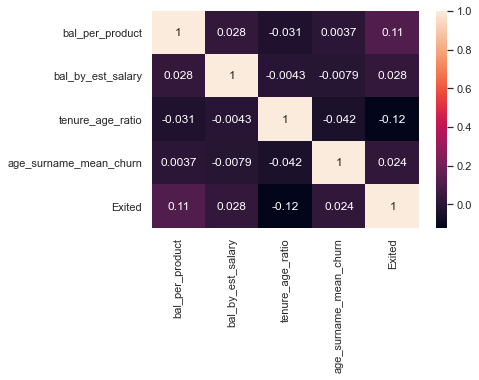

In [75]:
## Linear association of new columns with target variables to judge importance
sns.heatmap(df_train[new_cols + ['Exited']].corr(), annot=True)

### Observations

Out of the new features, ones with slight linear association/correlation are : bal_per_product and tenure_age_ratio

In [76]:
## Creating new interaction feature terms for validation set
eps = 1e-6

df_val['bal_per_product'] = df_val.Balance/(df_val.NumOfProducts + eps)
df_val['bal_by_est_salary'] = df_val.Balance/(df_val.EstimatedSalary + eps)
df_val['tenure_age_ratio'] = df_val.Tenure/(df_val.Age + eps)
df_val['age_surname_mean_churn'] = np.sqrt(df_val.Age) * df_val.Surname_enc

In [77]:
## Creating new interaction feature terms for test set
eps = 1e-6

df_test['bal_per_product'] = df_test.Balance/(df_test.NumOfProducts + eps)
df_test['bal_by_est_salary'] = df_test.Balance/(df_test.EstimatedSalary + eps)
df_test['tenure_age_ratio'] = df_test.Tenure/(df_test.Age + eps)
df_test['age_surname_mean_churn'] = np.sqrt(df_test.Age) * df_test.Surname_enc

## Numerical Feature

### Feature scaling and normalization

Feature scaling is important for algorithms like Logistic Regression and SVM. Not necessary for Tree-based models

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [80]:
#Scaling only continuous variables
cont_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Surname_enc', 'bal_per_product'
             , 'bal_by_est_salary', 'tenure_age_ratio', 'age_surname_mean_churn']
cat_vars = ['Gender', 'HasCrCard', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain']

In [81]:
## Scaling only continuous columns
cols_to_scale = cont_vars

In [82]:
sc_X_train = sc.fit_transform(df_train[cols_to_scale])

In [83]:
## Converting from array to dataframe and naming the respective features/columns
sc_X_train = pd.DataFrame(data = sc_X_train, columns = cols_to_scale)
sc_X_train.shape
sc_X_train.head()

(7920, 11)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,-1.247190,2.936683,-1.387508,-1.223495,0.807565,-0.002358,-0.010958,-1.104538,-0.035199,-1.379047,0.362137
1,1.658994,0.290102,1.728189,-1.223495,0.807565,-1.666260,0.672373,-1.104538,-0.035199,1.116567,0.747671
2,0.911689,-0.749626,-1.387508,-1.223495,0.807565,-0.715752,0.234849,-1.104538,-0.035199,-1.178645,0.104164
3,-0.676333,-0.466064,1.382001,-0.033833,-0.909920,-1.470895,0.672373,0.203414,0.005451,1.413292,0.566257
4,0.693726,2.275038,0.689623,0.748952,-0.909920,0.015647,-1.077724,1.064033,-0.025120,-0.299384,-1.061679


In [84]:
## Mapping learnt on the continuous features
sc_map = {'mean':sc.mean_, 'std':np.sqrt(sc.var_)}
sc_map

{'mean': array([6.51162121e+02, 3.89308081e+01, 5.00795455e+00, 7.64231171e+04,
        1.52979798e+00, 9.96388196e+04, 2.05269308e-01, 6.27529951e+04,
        4.27968922e+00, 1.37960245e-01, 1.26757655e+00]),
 'std': array([9.63462754e+01, 1.05796885e+01, 2.88859869e+00, 6.24629607e+04,
        5.82246572e-01, 5.75186575e+04, 1.90465613e-01, 5.68138093e+04,
        1.21584506e+02, 8.96811356e-02, 1.19393549e+00])}

In [85]:
## Scaling validation and test sets by transforming the mapping obtained through the training set
sc_X_val = sc.transform(df_val[cols_to_scale])
sc_X_test = sc.transform(df_test[cols_to_scale])

In [86]:
## Converting val and test arrays to dataframes for re-usability
sc_X_val = pd.DataFrame(data = sc_X_val, columns = cols_to_scale)
sc_X_test = pd.DataFrame(data = sc_X_test, columns = cols_to_scale)

## Feature Selection

Features shortlisted through EDA/manual inspection and bivariate analysis :

Age, Gender, Balance, NumOfProducts, IsActiveMember, the 3 country/Geography variables, bal per product, tenure age ratio

Now, let's see whether feature selection/elimination through RFE (Recursive Feature Elimination) gives us the same list of features, other extra features or lesser number of features

In [87]:
cont_vars
cat_vars

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain']

### RFE using LogisticRegression Model

In [88]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [89]:
## Creating feature-set and target for RFE model
y = df_train['Exited'].values
X = pd.concat([df_train[cat_vars], sc_X_train[cont_vars]], ignore_index=True, axis = 1) 
#if we use log reg model we use sc variable

X.columns = cat_vars + cont_vars

In [90]:
# for logistics regression
est = LogisticRegression()
num_features_to_select = 10

In [91]:
# for logistics regression
rfe = RFE(est, n_features_to_select = num_features_to_select) 
rfe = rfe.fit(X.values, y)  
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True False  True  True False False False
  True False False  True  True]
[1 5 1 1 1 1 4 1 1 8 7 6 1 2 3 1 1]


In [92]:
## Logistic Regression (Linear model)
mask = rfe.support_.tolist()
selected_feats = [b for a,b in zip(mask, X.columns) if a]
selected_feats

['Gender',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'Tenure',
 'Surname_enc',
 'tenure_age_ratio',
 'age_surname_mean_churn']

### RFE using Decision Tree Model

In [93]:
## Creating feature-set and target for RFE model
y = df_train['Exited'].values
X = df_train[cat_vars + cont_vars] # for non linear model
X.columns = cat_vars + cont_vars

In [94]:
# for decision trees
est_dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
num_features_to_select = 10

In [95]:
# for decision trees
rfe_dt = RFE(est_dt, n_features_to_select =num_features_to_select) 
rfe_dt = rfe_dt.fit(X.values, y)  
print(rfe_dt.support_)
print(rfe_dt.ranking_)

[False False  True False  True False False  True False False  True  True
  True  True  True  True  True]
[8 7 1 6 1 5 4 1 3 2 1 1 1 1 1 1 1]


In [96]:
## Decision Tree (Non-linear model)
mask = rfe_dt.support_.tolist()
selected_feats_dt = [b for a,b in zip(mask, X.columns) if a]
selected_feats_dt

['IsActiveMember',
 'country_Germany',
 'Age',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

### Baseline model : Logistic Regression

We'll train the linear models on the features selected through RFE

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [98]:
selected_cat_vars = [x for x in selected_feats if x in cat_vars]
selected_cont_vars = [x for x in selected_feats if x in cont_vars]

In [99]:
## Using categorical features and scaled numerical features
X_train = pd.concat((df_train[selected_cat_vars], sc_X_train[selected_cont_vars]), axis = 1)
X_val = pd.concat((df_val[selected_cat_vars], sc_X_val[selected_cont_vars]), axis = 1)
X_test = pd.concat((df_test[selected_cat_vars], sc_X_test[selected_cont_vars]), axis = 1)

X_train.shape, X_val.shape, X_test.shape

((7920, 10), (1080, 10), (1000, 10))

#### Solving class imbalance

In [102]:
np.unique(y_train, return_counts = True)

(array([0, 1], dtype=int64), array([6311, 1609], dtype=int64))

In [106]:
# Obtaining class weights based on the class samples imbalance ratio
_, num_samples = np.unique(y_train, return_counts = True)
weights = np.max(num_samples)/num_samples
weights
num_samples

array([1.      , 3.922312])

array([6311, 1609], dtype=int64)

In [107]:
weights_dict = dict()
class_labels = [0,1]
for a,b in zip(class_labels,weights):
    weights_dict[a] = b

weights_dict

{0: 1.0, 1: 3.9223119950279677}

In [108]:
## Defining model
lr = LogisticRegression(C = 1.0, penalty = 'l2', class_weight = weights_dict)

In [109]:
## Fitting model
lr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.0, 1: 3.9223119950279677})

#### Training metrics

0.7052810314032373

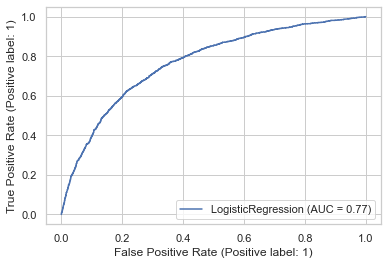

In [112]:
from sklearn.metrics import plot_roc_curve, auc

plot_roc_curve(lr, X_train, y_train) 

In [119]:
recall_score(y_train, lr.predict(X_train))
roc_auc_score(y_train, lr.predict(X_train))

0.7035425730267246

0.7052810314032373

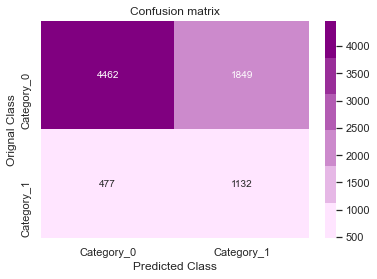

In [118]:
C = confusion_matrix(y_train, lr.predict(X_train))
labels = ['Category_0','Category_1']
cmap=sns.light_palette("purple")
sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Orignal Class')
plt.title('Confusion matrix')
plt.show();

In [114]:
## Fitted model parameters
selected_cat_vars + selected_cont_vars

lr.coef_
lr.intercept_

['Gender',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'Tenure',
 'Surname_enc',
 'tenure_age_ratio',
 'age_surname_mean_churn']

array([[-0.52043318, -0.93322841, -0.32372232,  0.62310206, -0.29464651,
         0.6738088 ,  0.13172195, -0.59906257, -0.2114149 ,  0.52886107]])

array([0.5519264])

#### Validation metrics

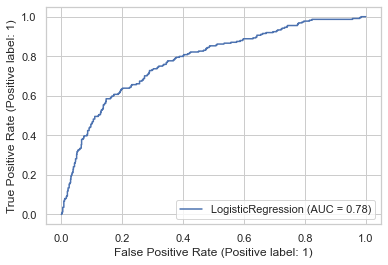

In [120]:
plot_roc_curve(lr, X_val, y_val) 

In [122]:
roc_auc_score(y_val, lr.predict(X_val))
recall_score(y_val, lr.predict(X_val))
confusion_matrix(y_val, lr.predict(X_val))
print(classification_report(y_val, lr.predict(X_val)))

0.7128671562082778

0.7142857142857143

array([[609, 247],
       [ 64, 160]], dtype=int64)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80       856
           1       0.39      0.71      0.51       224

    accuracy                           0.71      1080
   macro avg       0.65      0.71      0.65      1080
weighted avg       0.80      0.71      0.74      1080



#### Test metrics

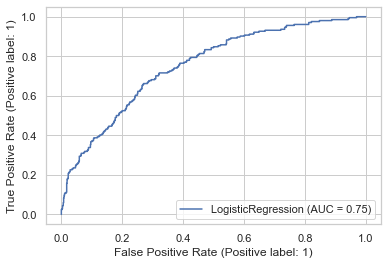

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, ConfusionMatrixDisplay

plot_roc_curve(lr, X_test, y_test) 


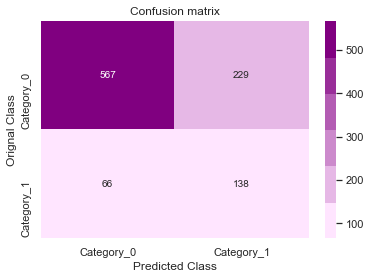

In [128]:
C = confusion_matrix(y_test, lr.predict(X_test))
labels = ['Category_0','Category_1']
cmap=sns.light_palette("purple")
sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Orignal Class')
plt.title('Confusion matrix')
plt.show();

In [129]:
roc_auc_score(y_test, lr.predict(X_test))
recall_score(y_test, lr.predict(X_test))
confusion_matrix(y_test, lr.predict(X_test))
print(classification_report(y_test, lr.predict(X_test)))

0.6943910730121194

0.6764705882352942

array([[567, 229],
       [ 66, 138]], dtype=int64)

              precision    recall  f1-score   support

           0       0.90      0.71      0.79       796
           1       0.38      0.68      0.48       204

    accuracy                           0.70      1000
   macro avg       0.64      0.69      0.64      1000
weighted avg       0.79      0.70      0.73      1000



### More linear models - SVM

In [130]:
from sklearn.svm import SVC
## Using categorical features and scaled numerical features
X_train = pd.concat((df_train[selected_cat_vars], sc_X_train[selected_cont_vars]), axis = 1)
X_val = pd.concat((df_val[selected_cat_vars], sc_X_val[selected_cont_vars]), axis = 1)
X_test = pd.concat((df_test[selected_cat_vars], sc_X_test[selected_cont_vars]), axis = 1)

X_train.shape, X_val.shape, X_test.shape

((7920, 10), (1080, 10), (1000, 10))

In [131]:
weights_dict = {0: 1.0, 1: 3.92}
weights_dict

{0: 1.0, 1: 3.92}

In [132]:
svm = SVC(C = 1.0, kernel = "linear", class_weight = weights_dict, probability=True)

In [133]:
svm.fit(X_train, y_train)

SVC(class_weight={0: 1.0, 1: 3.92}, kernel='linear', probability=True)

In [134]:
## Fitted model parameters
selected_cat_vars + selected_cont_vars

svm.coef_
svm.intercept_

['Gender',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'Tenure',
 'Surname_enc',
 'tenure_age_ratio',
 'age_surname_mean_churn']

array([[-0.49216727, -0.76601189, -0.30852834,  0.60403551, -0.29550717,
         0.80220241,  0.03101268, -0.48733223, -0.08266099,  0.4376582 ]])

array([0.46144064])

In [135]:
## Training metrics
roc_auc_score(y_train, svm.predict(X_train))
recall_score(y_train, svm.predict(X_train))
confusion_matrix(y_train, svm.predict(X_train))
print(classification_report(y_train, svm.predict(X_train)))

0.711265334363954

0.7072715972653822

array([[4514, 1797],
       [ 471, 1138]], dtype=int64)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      6311
           1       0.39      0.71      0.50      1609

    accuracy                           0.71      7920
   macro avg       0.65      0.71      0.65      7920
weighted avg       0.80      0.71      0.74      7920



In [136]:
## Validation metrics
roc_auc_score(y_val, svm.predict(X_val))
recall_score(y_val, svm.predict(X_val))
confusion_matrix(y_val, svm.predict(X_val))
print(classification_report(y_val, svm.predict(X_val)))

0.7188125834445928

0.7098214285714286

array([[623, 233],
       [ 65, 159]], dtype=int64)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       856
           1       0.41      0.71      0.52       224

    accuracy                           0.72      1080
   macro avg       0.66      0.72      0.66      1080
weighted avg       0.80      0.72      0.75      1080



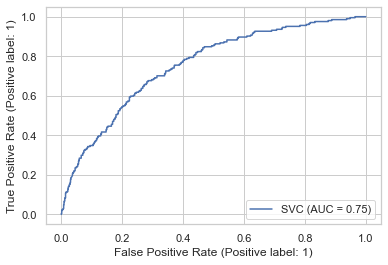

In [137]:
plot_roc_curve(svm, X_test, y_test) 

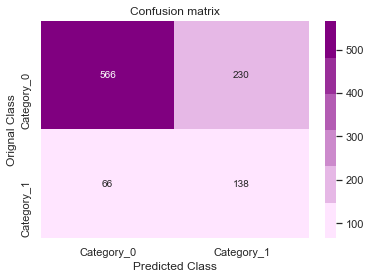

In [138]:
C = confusion_matrix(y_test, svm.predict(X_test))
labels = ['Category_0','Category_1']
cmap=sns.light_palette("purple")
sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Orignal Class')
plt.title('Confusion matrix')
plt.show();

### More baseline models (Non-linear) : Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier

## Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [140]:
weights_dict = {0: 1.0, 1: 3.92}
weights_dict

{0: 1.0, 1: 3.92}

In [141]:
## Features selected from the RFE process
selected_feats_dt

['IsActiveMember',
 'country_Germany',
 'Age',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

In [142]:
## Re-defining X_train and X_val to consider original unscaled continuous features. y_train and y_val remain unaffected
X_train = df_train[selected_feats_dt]
X_val = df_val[selected_feats_dt]
X_train.shape, y_train.shape
X_val.shape, y_val.shape

((7920, 10), (7920, 1))

((1080, 10), (1080, 1))

In [143]:
X_train.head()

,IsActiveMember,country_Germany,Age,NumOfProducts,EstimatedSalary,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,0,0.0,70,2,99503.19,0.203182,0.000000,0.000000,0.014286,1.699944
1,1,0.0,42,2,3797.79,0.333333,0.000000,0.000000,0.238095,2.160247
2,1,0.0,31,2,58469.75,0.250000,0.000000,0.000000,0.032258,1.391941
3,0,1.0,34,1,15034.93,0.333333,74309.735690,4.942478,0.264706,1.943651
4,1,1.0,63,1,100538.80,0.000000,123204.756795,1.225446,0.111111,0.000000


In [144]:
clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = weights_dict, max_depth = 4, max_features = None
                            , min_samples_split = 25, min_samples_leaf = 15)

In [145]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92}, criterion='entropy',
                       max_depth=4, min_samples_leaf=15, min_samples_split=25)

In [146]:
## Checking the importance of different features of the model
pd.DataFrame({'features': selected_feats_dt,
              'importance': clf.feature_importances_
             }).sort_values(by = 'importance', ascending=False)

,features,importance
2,Age,4.543418e-01
3,NumOfProducts,3.763497e-01
0,IsActiveMember,9.800924e-02
1,country_Germany,3.578216e-02
7,bal_by_est_salary,3.007829e-02
6,bal_per_product,2.934656e-03
4,EstimatedSalary,2.504166e-03
5,Surname_enc,7.322283e-17
8,tenure_age_ratio,0.000000e+00
9,age_surname_mean_churn,0.000000e+00


In [147]:
## Training metrics
roc_auc_score(y_train, clf.predict(X_train))
recall_score(y_train, clf.predict(X_train))
confusion_matrix(y_train, clf.predict(X_train))
print(classification_report(y_train, clf.predict(X_train)))

0.7561891156729217

0.7470478558110628

array([[4830, 1481],
       [ 407, 1202]], dtype=int64)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6311
           1       0.45      0.75      0.56      1609

    accuracy                           0.76      7920
   macro avg       0.69      0.76      0.70      7920
weighted avg       0.83      0.76      0.78      7920



In [148]:
## Validation metrics
roc_auc_score(y_val, clf.predict(X_val))
recall_score(y_val, clf.predict(X_val))
confusion_matrix(y_val, clf.predict(X_val))
print(classification_report(y_val, clf.predict(X_val)))

0.7566338451268358

0.7410714285714286

array([[661, 195],
       [ 58, 166]], dtype=int64)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       856
           1       0.46      0.74      0.57       224

    accuracy                           0.77      1080
   macro avg       0.69      0.76      0.70      1080
weighted avg       0.82      0.77      0.78      1080



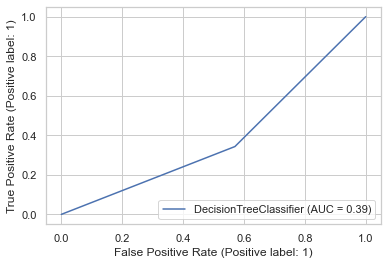

In [151]:
plot_roc_curve(clf, X_test, y_test) 

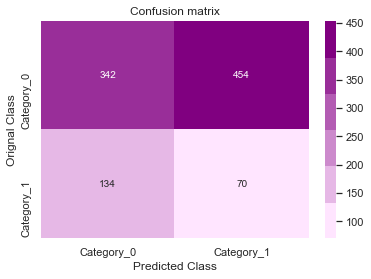

In [152]:
C = confusion_matrix(y_test, clf.predict(X_test))
labels = ['Category_0','Category_1']
cmap=sns.light_palette("purple")
sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Orignal Class')
plt.title('Confusion matrix')
plt.show();

#### Decision tree rule engine visualization

In [153]:
from sklearn.tree import export_graphviz
import subprocess

In [154]:
clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = weights_dict, max_depth = 3, max_features = None
                            , min_samples_split = 25, min_samples_leaf = 15)

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92}, criterion='entropy',
                       max_depth=3, min_samples_leaf=15, min_samples_split=25)

In [155]:
## Export as dot file
dot_data = export_graphviz(clf, out_file = 'tree.dot'
                          , feature_names = selected_feats_dt
                          , class_names = ['Did not churn', 'Churned']
                          , rounded = True, proportion = False
                          , precision = 2, filled = True)

In [156]:
## Convert to png using system command (requires Graphviz)
subprocess.run(['dot', '-Tpng','tree.dot', '-o', 'tree.png', '-Gdpi=600'])

CompletedProcess(args=['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'], returncode=0)

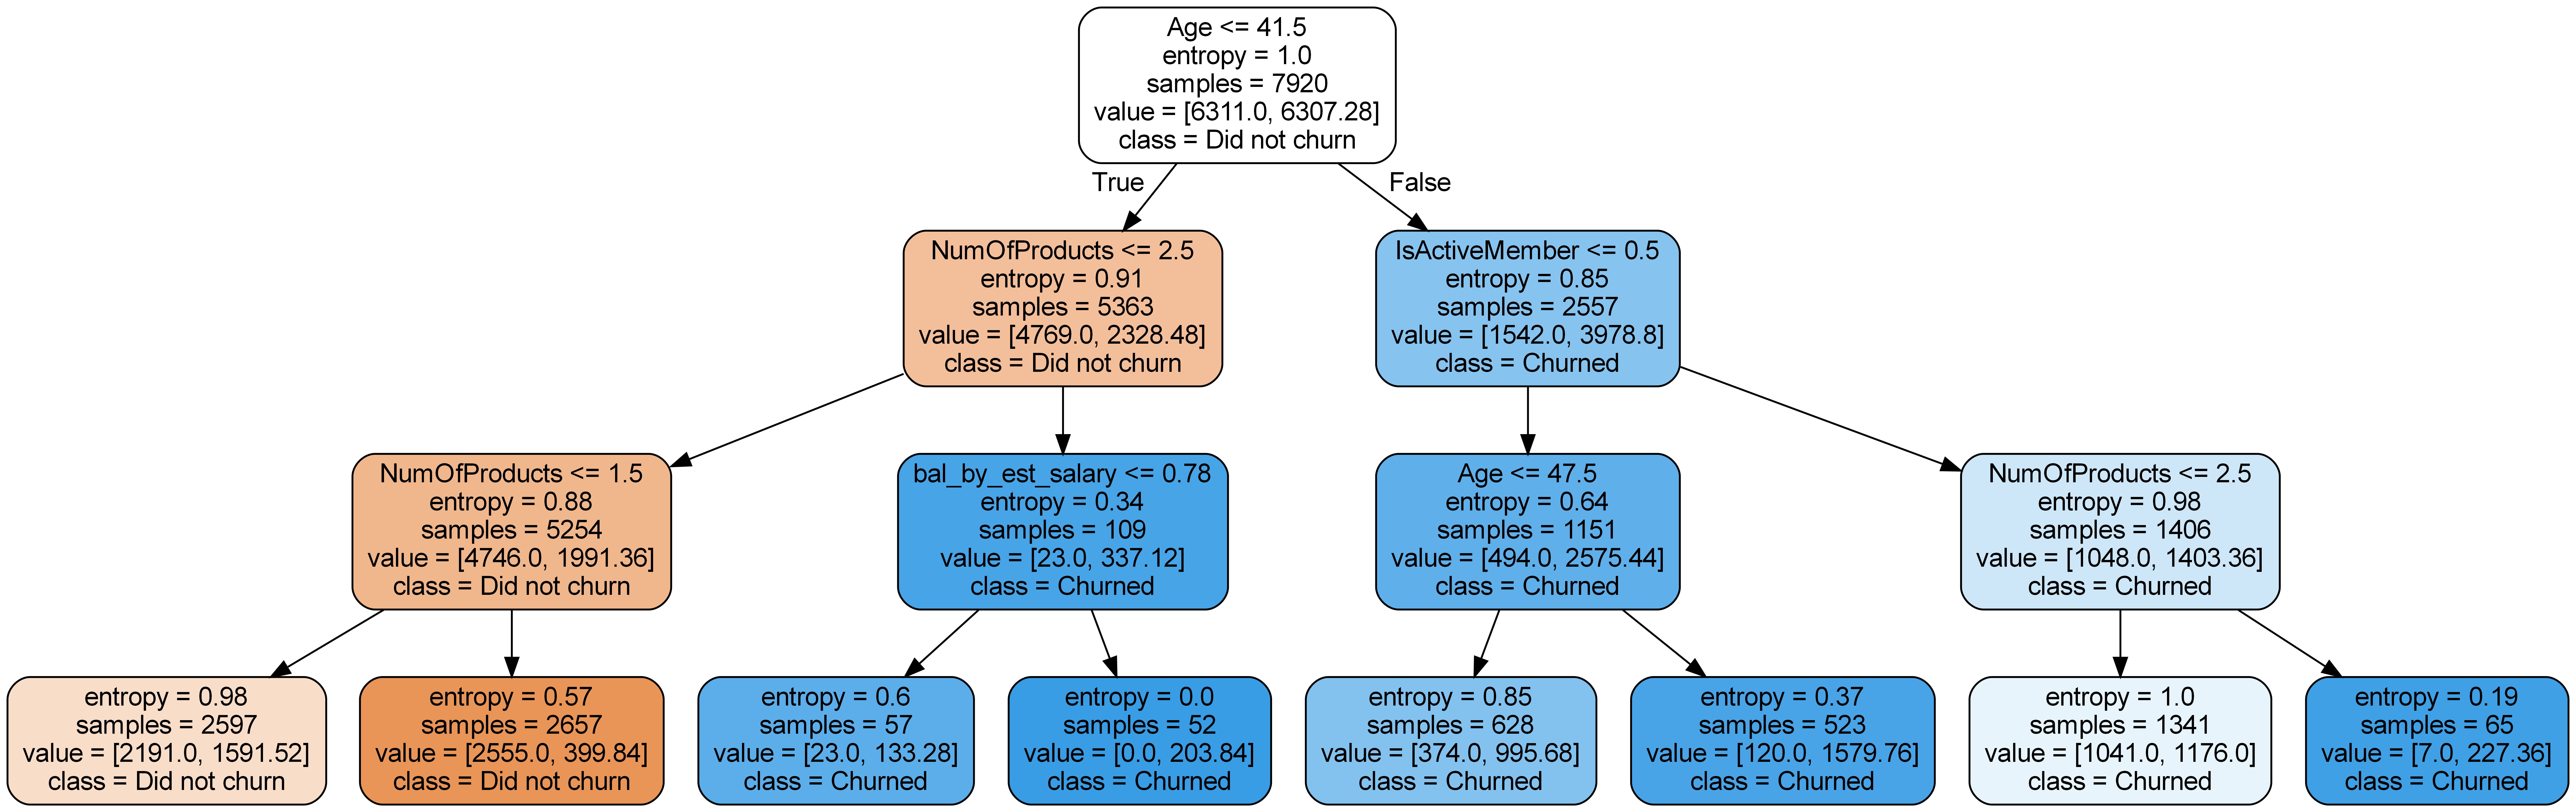

In [157]:
## Display the rule-set of a single tree
from IPython.display import Image
Image(filename = 'tree.png')

## Spot-checking various ML algorithms

### Spot-checking various ML algorithms

__Steps__ :

- Automate data preparation and model run through Pipelines

- Model Zoo : List of all models to compare/spot-check

- Evaluate using k-fold Cross validation framework

#### Automating data preparation and model run through Pipelines

In [158]:
from sklearn.base import BaseEstimator, TransformerMixin

In [164]:
## Reading the dataset
df = pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/360/Churn_Modelling.csv")

In [165]:
## Separating out different columns into various categories as defined above
target_var = ['Exited']
cols_to_remove = ['RowNumber', 'CustomerId']
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_feats = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [166]:
## Separating out target variable and removing the non-essential columns
y = df[target_var].values
df.drop(cols_to_remove, axis=1, inplace=True)

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
## Keeping aside a test/holdout set
df_train_val, df_test, y_train_val, y_test = train_test_split(df, y.ravel(), test_size = 0.1, random_state = 42)

## Splitting into train and validation set
df_train, df_val, y_train, y_val = train_test_split(df_train_val, y_train_val, test_size = 0.12, random_state = 42)

In [169]:
df_train.shape, df_val.shape, df_test.shape, y_train.shape, y_val.shape, y_test.shape
np.mean(y_train), np.mean(y_val), np.mean(y_test)

((7920, 12), (1080, 12), (1000, 12), (7920,), (1080,), (1000,))

(0.20303030303030303, 0.22037037037037038, 0.191)

In [159]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """ 
    Encodes categorical columns using LabelEncoding, OneHotEncoding and TargetEncoding.
    LabelEncoding is used for binary categorical columns
    OneHotEncoding is used for columns with <= 10 distinct values
    TargetEncoding is used for columns with higher cardinality (>10 distinct values)
    
    """

    def __init__(self, cols = None, lcols = None, ohecols = None, tcols = None, reduce_df = False):
        """
        
        Parameters
        ----------
        cols : list of str
            Columns to encode.  Default is to one-hot/target/label encode all categorical columns in the DataFrame.
        reduce_df : bool
            Whether to use reduced degrees of freedom for encoding
            (that is, add N-1 one-hot columns for a column with N 
            categories). E.g. for a column with categories A, B, 
            and C: When reduce_df is True, A=[1, 0], B=[0, 1],
            and C=[0, 0].  When reduce_df is False, A=[1, 0, 0], 
            B=[0, 1, 0], and C=[0, 0, 1]
            Default = False
        
        """
        
        if isinstance(cols,str):
            self.cols = [cols]
        else :
            self.cols = cols
        
        if isinstance(lcols,str):
            self.lcols = [lcols]
        else :
            self.lcols = lcols
        
        if isinstance(ohecols,str):
            self.ohecols = [ohecols]
        else :
            self.ohecols = ohecols
        
        if isinstance(tcols,str):
            self.tcols = [tcols]
        else :
            self.tcols = tcols
        
        self.reduce_df = reduce_df
    
    
    def fit(self, X, y):
        """Fit label/one-hot/target encoder to X and y
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : encoder
            Returns self.
        """
        
        # Encode all categorical cols by default
        if self.cols is None:
            self.cols = [c for c in X if str(X[c].dtype)=='object']

        # Check columns are in X
        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')
        
        # Separating out lcols, ohecols and tcols
        if self.lcols is None:
            self.lcols = [c for c in self.cols if X[c].nunique() <= 2]
        
        if self.ohecols is None:
            self.ohecols = [c for c in self.cols if ((X[c].nunique() > 2) & (X[c].nunique() <= 10))]
        
        if self.tcols is None:
            self.tcols = [c for c in self.cols if X[c].nunique() > 10]
        
        
        ## Create Label Encoding mapping
        self.lmaps = dict()
        for col in self.lcols:
            self.lmaps[col] = dict(zip(X[col].values, X[col].astype('category').cat.codes.values))
        
        
        ## Create OneHot Encoding mapping
        self.ohemaps = dict() #dict to store map for each column
        for col in self.ohecols:
            self.ohemaps[col] = []
            uniques = X[col].unique()
            for unique in uniques:
                self.ohemaps[col].append(unique)
            if self.reduce_df:
                del self.ohemaps[col][-1]
        
        
        ## Create Target Encoding mapping
        self.global_target_mean = y.mean().round(2)
        self.sum_count = dict()
        for col in self.tcols:
            self.sum_count[col] = dict()
            uniques = X[col].unique()
            for unique in uniques:
                ix = X[col]==unique
                self.sum_count[col][unique] = (y[ix].sum(),ix.sum())
        
        
        ## Return the fit object
        return self
    
    
    def transform(self, X, y=None):
        """Perform label/one-hot/target encoding transformation.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to label encode
            
        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        
        Xo = X.copy()
        ## Perform label encoding transformation
        for col, lmap in self.lmaps.items():
            
            # Map the column
            Xo[col] = Xo[col].map(lmap)
            Xo[col].fillna(-1, inplace=True) ## Filling new values with -1
        
        
        ## Perform one-hot encoding transformation
        for col, vals in self.ohemaps.items():
            for val in vals:
                new_col = col+'_'+str(val)
                Xo[new_col] = (Xo[col]==val).astype('uint8')
            del Xo[col]
        
        
        ## Perform LOO target encoding transformation
        # Use normal target encoding if this is test data
        if y is None:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    vals[X[col]==cat] = (sum_count[0]/sum_count[1]).round(2)
                Xo[col] = vals
                Xo[col].fillna(self.global_target_mean, inplace=True) # Filling new values by global target mean

        # LOO target encode each column
        else:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    ix = X[col]==cat
                    if sum_count[1] > 1:
                        vals[ix] = ((sum_count[0]-y[ix].reshape(-1,))/(sum_count[1]-1)).round(2)
                    else :
                        vals[ix] = ((y.sum() - y[ix])/(X.shape[0] - 1)).round(2) # Catering to the case where a particular 
                                                                                 # category level occurs only once in the dataset
                
                Xo[col] = vals
                Xo[col].fillna(self.global_target_mean, inplace=True) # Filling new values by global target mean
        
        
        ## Return encoded DataFrame
        return Xo
    
    
    def fit_transform(self, X, y=None):
        """Fit and transform the data via label/one-hot/target encoding.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        
        return self.fit(X, y).transform(X, y)
    


In [173]:
class AddFeatures(BaseEstimator):
    """
    Add new, engineered features using original categorical and numerical features of the DataFrame
    """
    
    def __init__(self, eps = 1e-6):
        """
        Parameters
        ----------
        eps : A small value to avoid divide by zero error. Default value is 0.000001
        """
        
        self.eps = eps
    
    
    def fit(self, X, y=None):
        return self
    
    
    def transform(self, X):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing base columns using which new interaction-based features can be engineered
        """
        Xo = X.copy()
#         print(Xo.head())
        ## Add 4 new columns - bal_per_product, bal_by_est_salary, tenure_age_ratio, age_surname_mean_churn
        Xo['bal_per_product'] = Xo.Balance/(Xo.NumOfProducts + self.eps)
        Xo['bal_by_est_salary'] = Xo.Balance/(Xo.EstimatedSalary + self.eps)
        Xo['tenure_age_ratio'] = Xo.Tenure/(Xo.Age + self.eps)
        Xo['age_surname_enc'] = np.sqrt(Xo.Age) * Xo.Surname
        
        ## Returning the updated dataframe
        return Xo
    
    
    def fit_transform(self, X, y=None):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing base columns using which new interaction-based features can be engineered
        """
        return self.fit(X,y).transform(X)
    
    

In [174]:
class CustomScaler(BaseEstimator, TransformerMixin):
    """
    A custom standard scaler class with the ability to apply scaling on selected columns
    """
    
    def __init__(self, scale_cols = None):
        """
        Parameters
        ----------
        scale_cols : list of str
            Columns on which to perform scaling and normalization. Default is to scale all numerical columns
        
        """
        self.scale_cols = scale_cols
    
    
    def fit(self, X, y=None):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to scale
        """
        
        # Scaling all non-categorical columns if user doesn't provide the list of columns to scale
        if self.scale_cols is None:
            self.scale_cols = [c for c in X if ((str(X[c].dtype).find('float') != -1) or (str(X[c].dtype).find('int') != -1))]
        
     
        ## Create mapping corresponding to scaling and normalization
        self.maps = dict()
        for col in self.scale_cols:
            self.maps[col] = dict()
            self.maps[col]['mean'] = np.mean(X[col].values).round(2)
            self.maps[col]['std_dev'] = np.std(X[col].values).round(2)
        
        # Return fit object
        return self
    
    
    def transform(self, X):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to scale
        """
        Xo = X.copy()
        
        ## Map transformation to respective columns
        for col in self.scale_cols:
            Xo[col] = (Xo[col] - self.maps[col]['mean']) / self.maps[col]['std_dev']
        
        
        # Return scaled and normalized DataFrame
        return Xo
    
    
    def fit_transform(self, X, y=None):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to scale
        """
        # Fit and return transformed dataframe
        return self.fit(X).transform(X)

### Pipeline in action for a single model

In [175]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

## Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [176]:
X = df_train.drop(columns = ['Exited'], axis = 1)
X_val = df_val.drop(columns = ['Exited'], axis = 1)

cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio'
                ,'age_surname_enc']

In [177]:
weights_dict = {0 : 1.0, 1 : 3.92}

clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = weights_dict, max_depth = 4, max_features = None
                            , min_samples_split = 25, min_samples_leaf = 15)

In [178]:
model = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('standard_scaling', CustomScaler(cols_to_scale)),
                          ('classifier', clf)
                         ])

In [179]:
# Fit pipeline with training data
model.fit(X,y_train)

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=['Surname', 'Geography', 'Gender'],
                                    lcols=['Gender'], ohecols=['Geography'],
                                    tcols=['Surname'])),
                ('add_new_features', AddFeatures()),
                ('standard_scaling',
                 CustomScaler(scale_cols=['CreditScore', 'Age', 'Balance',
                                          'EstimatedSalary', 'bal_per_product',
                                          'bal_by_est_salary',
                                          'tenure_age_ratio',
                                          'age_surname_enc'])),
                ('classifier',
                 DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92},
                                        criterion='entropy', max_depth=4,
                                        min_samples_leaf=15,
                                        min_samples_split=25))])

In [180]:
# Predict target values on val data
val_preds = model.predict(X_val)

In [181]:
## Validation metrics
roc_auc_score(y_val, val_preds)
recall_score(y_val, val_preds)
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

0.7477394758378411

0.7436974789915967

array([[633, 209],
       [ 61, 177]], dtype=int64)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       842
           1       0.46      0.74      0.57       238

    accuracy                           0.75      1080
   macro avg       0.69      0.75      0.70      1080
weighted avg       0.81      0.75      0.77      1080



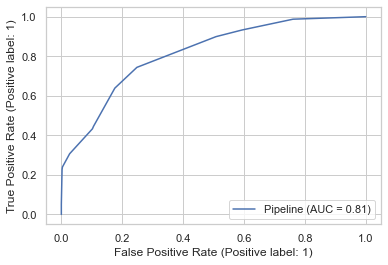

In [182]:
plot_roc_curve(model, X_val, y_val) 

### Model Zoo + k-fold Cross Validation

Models : RF, LGBM, XGB, Naive Bayes (Gaussian/Multinomial), kNN

In [183]:
from sklearn.model_selection import cross_val_score

In [184]:
## Preparing data and a few common model parameters
X = df_train.drop(columns = ['Exited'], axis = 1)
y = y_train.ravel()

weights_dict = {0 : 1.0, 1 : 3.93}
_, num_samples = np.unique(y_train, return_counts = True)
weight = (num_samples[0]/num_samples[1]).round(2)
weight

cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio'
                ,'age_surname_enc']

3.93

In [185]:
## Importing the models to be tried out
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [191]:
## Preparing a list of models to try out in the spot-checking process
def model_zoo(models = dict()):
    # Tree models
    for n_trees in [21, 1001]:
        models['rf_' + str(n_trees)] = RandomForestClassifier(n_estimators = n_trees, criterion = 'entropy'
                                                              , class_weight = weights_dict, max_depth = 6, max_features = 0.6
                                                              , min_samples_split = 30, min_samples_leaf = 20)
        
        models['lgb_' + str(n_trees)] = LGBMClassifier(boosting_type='dart', num_leaves=31, max_depth= 6, learning_rate=0.1
                                                       , n_estimators=n_trees, class_weight=weights_dict, min_child_samples=20
                                                       , colsample_bytree=0.6, reg_alpha=0.3, reg_lambda=1.0,importance_type = 'gain')
        
        models['xgb_' + str(n_trees)] = XGBClassifier(objective='binary:logistic', n_estimators = n_trees, max_depth = 6
                                                      , learning_rate = 0.03, colsample_bytree = 0.6
                                                      , reg_alpha = 0.3, reg_lambda = 0.1, scale_pos_weight = weight)
        
        models['et_' + str(n_trees)] = ExtraTreesClassifier(n_estimators=n_trees, criterion = 'entropy', max_depth = 6
                                                            , max_features = 0.6, class_weight = weights_dict
                                                            , min_samples_split = 30, min_samples_leaf = 20)
    
    # kNN models
    for n in [3,5,11]:
        models['knn_' + str(n)] = KNeighborsClassifier(n_neighbors=n)
    
    # Naive-Bayes models
    models['gauss_nb'] = GaussianNB()
    models['multi_nb'] = MultinomialNB()
    models['compl_nb'] = ComplementNB()
    models['bern_nb'] = BernoulliNB()
    
    return models

In [192]:
## Automation of data preparation and model run through pipelines
def make_pipeline(model):
    '''
    Creates pipeline for the model passed as the argument. Uses standard scaling only in case of kNN models. 
    Ignores scaling step for tree/Naive Bayes models
    '''
    
    if (str(model).find('KNeighborsClassifier') != -1):
        pipe =  Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                              ('add_new_features', AddFeatures()),
                              ('standard_scaling', CustomScaler(cols_to_scale)),
                              ('classifier', model)
                             ])
    else :
        pipe =  Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                              ('add_new_features', AddFeatures()),
                              ('classifier', model)
                             ])
    
    
    return pipe


In [193]:
## Run/Evaluate all 15 models using KFold cross-validation (5 folds)
def evaluate_models(X, y, models, folds = 5, metric = 'recall'):
    results = dict()
    for name, model in models.items():
        # Evaluate model through automated pipelines
        pipeline = make_pipeline(model)
        scores = cross_val_score(pipeline, X, y, cv = folds, scoring = metric) # here n jobs should be -1 to allow the model evaluations to occur in parallel, 
#         harnessing as many cores as you have available on your hardware.
        
        # Store results of the evaluated model
        results[name] = scores
        mu, sigma = np.mean(scores), np.std(scores)
        # Printing individual model results
        print('Model {}: mean = {}, std_dev = {}'.format(name, mu, sigma))
    
    return results
        

In [194]:
## Spot-checking in action
models = model_zoo()
print('Recall metric')
results = evaluate_models(X, y , models, metric = 'recall')
print('F1-score metric')
results = evaluate_models(X, y , models, metric = 'f1')

Recall metric
Model rf_21: mean = 0.7394226117915675, std_dev = 0.02051888024325995
Model lgb_21: mean = 0.7462529749811342, std_dev = 0.021451811890045795
Model xgb_21: mean = 0.7195197461349432, std_dev = 0.014505096894315908
Model et_21: mean = 0.73196726069542, std_dev = 0.012606711986078408
Model rf_1001: mean = 0.7381726359784059, std_dev = 0.01584981165230919
Model lgb_1001: mean = 0.6262340124997581, std_dev = 0.02347185271419394
Model xgb_1001: mean = 0.6163019291422379, std_dev = 0.02118926294532161
Model et_1001: mean = 0.7369400746889573, std_dev = 0.0069728539678243166
Model knn_3: mean = 0.3308391865482479, std_dev = 0.0257896061929066
Model knn_5: mean = 0.30969795476093726, std_dev = 0.01633554361744493
Model knn_11: mean = 0.2506143456976452, std_dev = 0.007246171430455652
Model gauss_nb: mean = 0.03484646194926569, std_dev = 0.015468568191425867
Model multi_nb: mean = 0.5404191095373541, std_dev = 0.022285871235774777
Model compl_nb: mean = 0.5404191095373541, std_dev

<h4>Based on the relevant metric, a suitable model can be chosen for further hyperparameter tuning.

LightGBM is chosen for further hyperparameter tuning because it has the best performance on recall metric and it came close second when comparing using F1-scores</h4>

### Hyperparameter tuning

In [195]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier

In [196]:
## Preparing data and a few common model parameters
# Unscaled features will be used since it's a tree model

X_train = df_train.drop(columns = ['Exited'], axis = 1)
X_val = df_val.drop(columns = ['Exited'], axis = 1)

X_train.shape, y_train.shape
X_val.shape, y_val.shape

((7920, 11), (7920,))

((1080, 11), (1080,))

In [197]:
lgb = LGBMClassifier(boosting_type = 'dart', min_child_samples = 20, importance_type = 'gain', num_leaves = 31)

In [198]:
model = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb)
                         ])

#### Randomized Search

In [199]:
## Exhaustive list of parameters
parameters = {'classifier__n_estimators':[10, 21, 51, 100, 201, 350, 501]
             ,'classifier__max_depth': [3, 4, 6, 9]
             ,'classifier__num_leaves':[7, 15, 31] 
             ,'classifier__learning_rate': [0.03, 0.05, 0.1, 0.5, 1]
             ,'classifier__colsample_bytree': [0.3, 0.6, 0.8]
             ,'classifier__reg_alpha': [0, 0.3, 1, 5] # l1 reg param
             ,'classifier__reg_lambda': [0.1, 0.5, 1, 5, 10]# L2 reg param
             ,'classifier__class_weight': [{0:1,1:1.0}, {0:1,1:1.96}, {0:1,1:3.0}, {0:1,1:3.93}]
             }

In [200]:
search = RandomizedSearchCV(model, parameters, n_iter = 20, cv = 5, scoring = 'f1')

In [201]:
search.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('categorical_encoding',
                                              CategoricalEncoder()),
                                             ('add_new_features',
                                              AddFeatures()),
                                             ('classifier',
                                              LGBMClassifier(boosting_type='dart',
                                                             importance_type='gain'))]),
                   n_iter=20,
                   param_distributions={'classifier__class_weight': [{0: 1,
                                                                      1: 1.0},
                                                                     {0: 1,
                                                                      1: 1.96},
                                                                     {0: 1,
                                                           

In [202]:
search.best_params_
search.best_score_

{'classifier__reg_lambda': 10,
 'classifier__reg_alpha': 5,
 'classifier__num_leaves': 15,
 'classifier__n_estimators': 201,
 'classifier__max_depth': 9,
 'classifier__learning_rate': 0.05,
 'classifier__colsample_bytree': 0.6,
 'classifier__class_weight': {0: 1, 1: 1.96}}

0.623626789478134

In [203]:
search.cv_results_

{'mean_fit_time': array([ 9.10976229,  9.0766768 ,  8.16553602,  8.72116909,  8.84345965,
        10.41879158,  8.30962639,  8.5728292 ,  7.85483961,  9.84666996,
         9.75608578,  8.11515222,  7.93396068,  7.97595234,  8.89382443,
         9.77494779, 10.57800589,  9.36977634,  8.4028728 ,  8.5805778 ]),
 'std_fit_time': array([0.21207114, 0.45549556, 0.34371411, 0.32491481, 0.19577779,
        0.25903168, 0.32093676, 0.20397123, 0.09949177, 0.13718067,
        0.08371154, 0.22055639, 0.21505501, 0.25276686, 0.47708142,
        0.78800022, 0.16919159, 0.2984611 , 0.15247408, 0.37176144]),
 'mean_score_time': array([1.71240067, 1.72009907, 1.68409071, 1.70316381, 1.67753897,
        1.74832225, 1.62109184, 1.64403057, 1.6108027 , 1.67713914,
        1.58846426, 1.68595281, 1.63499403, 1.74674764, 1.69684606,
        2.03239503, 1.72071104, 1.67714086, 1.71841173, 1.65937886]),
 'std_score_time': array([0.09433156, 0.0972162 , 0.0990584 , 0.06455441, 0.03973015,
        0.07088519, 

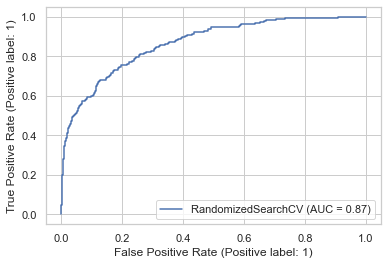

In [205]:
plot_roc_curve(search, X_val, y_val) 

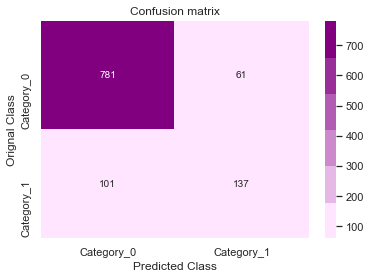

In [206]:
C = confusion_matrix(y_val, search.predict(X_val))
labels = ['Category_0','Category_1']
cmap=sns.light_palette("purple")
sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Orignal Class')
plt.title('Confusion matrix')
plt.show();

## Grid Search

In [263]:
## Current list of parameters
# first try to find the best n_estimators and class_weight
parameters = {'classifier__n_estimators':[101,201,350,750]
             ,'classifier__max_depth': [6]
             ,'classifier__num_leaves': [63]
             ,'classifier__learning_rate': [0.1]
             ,'classifier__colsample_bytree': [0.6]
             ,'classifier__reg_alpha': [1]
             ,'classifier__reg_lambda': [ 1]
             ,'classifier__class_weight': [{0:1,1: 1.96},{0:1,1:3.0},{0:1,1:3.93}]
             }

In [264]:
grid = GridSearchCV(model, parameters, cv = 5, scoring = 'f1')

In [265]:
grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('categorical_encoding',
                                        CategoricalEncoder(cols=['Surname',
                                                                 'Geography',
                                                                 'Gender'],
                                                           lcols=['Gender'],
                                                           ohecols=['Geography'],
                                                           tcols=['Surname'])),
                                       ('add_new_features', AddFeatures()),
                                       ('classifier',
                                        LGBMClassifier(boosting_type='dart',
                                                       class_weight={0: 1,
                                                                     1: 3.0},
                                                       colsample_bytree=0.6,
           

In [266]:
grid.best_params_
grid.best_score_

{'classifier__class_weight': {0: 1, 1: 3.0},
 'classifier__colsample_bytree': 0.6,
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 6,
 'classifier__n_estimators': 201,
 'classifier__num_leaves': 63,
 'classifier__reg_alpha': 1,
 'classifier__reg_lambda': 1}

0.623262117327956

In [267]:
### classifier__n_estimators': 201
## classifier__class_weight': {0: 1, 1: 3.0}
## Now change other parameters

In [268]:
## Current list of parameters
# first try to find the best classifier__num_leaves and classifier__learning_rate and classifier__max_depth
parameters = {'classifier__n_estimators':[201]
             ,'classifier__max_depth': [4,6]
             ,'classifier__num_leaves': [15,63]
             ,'classifier__learning_rate': [0.01,0.1,1]
             ,'classifier__colsample_bytree': [0.6]
             ,'classifier__reg_alpha': [1]
             ,'classifier__reg_lambda': [ 1]
             ,'classifier__class_weight': [{0:1,1:3.0}]
             }

In [269]:
grid = GridSearchCV(model, parameters, cv = 5, scoring = 'f1')

In [270]:
grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('categorical_encoding',
                                        CategoricalEncoder(cols=['Surname',
                                                                 'Geography',
                                                                 'Gender'],
                                                           lcols=['Gender'],
                                                           ohecols=['Geography'],
                                                           tcols=['Surname'])),
                                       ('add_new_features', AddFeatures()),
                                       ('classifier',
                                        LGBMClassifier(boosting_type='dart',
                                                       class_weight={0: 1,
                                                                     1: 3.0},
                                                       colsample_bytree=0.6,
           

In [271]:
grid.best_params_
grid.best_score_

{'classifier__class_weight': {0: 1, 1: 3.0},
 'classifier__colsample_bytree': 0.6,
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 6,
 'classifier__n_estimators': 201,
 'classifier__num_leaves': 15,
 'classifier__reg_alpha': 1,
 'classifier__reg_lambda': 1}

0.625394097396268

In [ ]:
## classifier__n_estimators': 201
## classifier__class_weight': {0: 1, 1: 3.0}
## classifier__num_leaves': 15,
## classifier__learning_rate': 0.1
## classifier__max_depth': 6
## Now change other parameters

In [272]:
## Current list of parameters
# first try to find the best classifier__num_leaves and classifier__learning_rate and classifier__max_depth
parameters = {'classifier__n_estimators':[201]
             ,'classifier__max_depth': [6]
             ,'classifier__num_leaves': [15]
             ,'classifier__learning_rate': [0.1]
             ,'classifier__colsample_bytree': [0.6,0.8]
             ,'classifier__reg_alpha': [0,1,10]
             ,'classifier__reg_lambda': [0.1,1,5]
             ,'classifier__class_weight': [{0:1,1:3.0}]
             }

In [273]:
grid = GridSearchCV(model, parameters, cv = 5, scoring = 'f1')

In [274]:
grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('categorical_encoding',
                                        CategoricalEncoder(cols=['Surname',
                                                                 'Geography',
                                                                 'Gender'],
                                                           lcols=['Gender'],
                                                           ohecols=['Geography'],
                                                           tcols=['Surname'])),
                                       ('add_new_features', AddFeatures()),
                                       ('classifier',
                                        LGBMClassifier(boosting_type='dart',
                                                       class_weight={0: 1,
                                                                     1: 3.0},
                                                       colsample_bytree=0.6,
           

In [275]:
grid.best_params_
grid.best_score_

{'classifier__class_weight': {0: 1, 1: 3.0},
 'classifier__colsample_bytree': 0.6,
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 6,
 'classifier__n_estimators': 201,
 'classifier__num_leaves': 15,
 'classifier__reg_alpha': 0,
 'classifier__reg_lambda': 0.1}

0.6283635119657223

In [ ]:
#check cv results and try to select those parameters set for which the std dev of scores is less rather than just selecting the parameter set with 
#highest score

### Error analysis

In [276]:
# recheck if any faulty assumptions are made in the process
# look at incorrect prediction and see why it happened

In [277]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

In [278]:
## Preparing data for error analysis
# Unscaled features will be used since it's a tree model

X_train = df_train.drop(columns = ['Exited'], axis = 1)
X_val = df_val.drop(columns = ['Exited'], axis = 1)

X_train.shape, y_train.shape
X_val.shape, y_val.shape

((7920, 11), (7920,))

((1080, 11), (1080,))

In [279]:
## Final model with best params for F1-score metric

lgb = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 3.0}, min_child_samples = 20
                     , importance_type = 'gain', max_depth = 6, num_leaves = 15, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 201, reg_alpha = 0, reg_lambda = 0.1)


model = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb)
                         ])

In [280]:
## Fit best model
model.fit(X_train, y_train.ravel())

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=['Surname', 'Geography', 'Gender'],
                                    lcols=['Gender'], ohecols=['Geography'],
                                    tcols=['Surname'])),
                ('add_new_features', AddFeatures()),
                ('classifier',
                 LGBMClassifier(boosting_type='dart',
                                class_weight={0: 1, 1: 3.0},
                                colsample_bytree=0.6, importance_type='gain',
                                max_depth=6, n_estimators=201, num_leaves=15,
                                reg_alpha=0, reg_lambda=0.1))])

In [281]:
## Making predictions on a copy of validation set
df_ea = df_val.copy()
df_ea['y_pred'] = model.predict(X_val)
df_ea['y_pred_prob'] = model.predict_proba(X_val)[:,1]

In [282]:
df_ea.shape
df_ea.sample(5)

(1080, 14)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,y_pred,y_pred_prob
7126,Graham,523,France,Female,26,4,0.00,2,1,0,185488.81,0,0,0.103224
6893,Cremonesi,578,France,Male,50,5,151215.34,2,1,0,169804.40,0,1,0.742949
7761,Watkins,627,Germany,Male,30,3,128770.88,2,1,1,40199.01,0,0,0.109755
4965,McCarthy,782,France,Male,36,1,148795.17,2,1,1,195681.43,0,0,0.139382
3584,Threatt,506,Germany,Male,28,8,53053.76,1,0,1,24577.34,0,0,0.066489


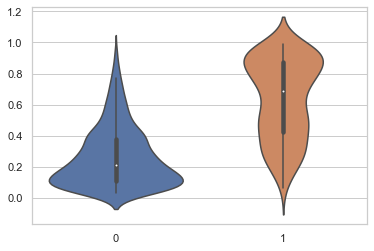

In [285]:
## Visualizing distribution of predicted probabilities
sns.violinplot(y_val.ravel(), df_ea['y_pred_prob'].values)

In [ ]:
# Ideaaly the seperation should be there at 0.5 threshold
# All the class 1 probab should be greater than 0.5
# less intersection implies less error

#### Revisiting bivariate plots of important features

The difference in distribution of these features across the two classes help us to test a few hypotheses

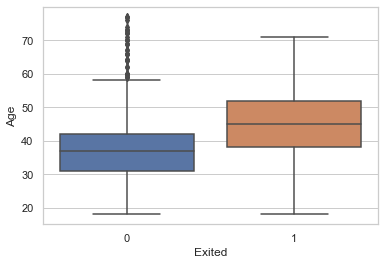

In [220]:
sns.boxplot(x = 'Exited', y = 'Age', data = df_ea)

In [ ]:
# above age 42 - dominated by class 1

In [286]:
## Are we able to correctly identify pockets of high-churn customer regions in feature space?
df_ea.Exited.value_counts(normalize=True).sort_index()
df_ea[(df_ea.Age > 42) & (df_ea.Age < 53)].Exited.value_counts(normalize=True).sort_index()
df_ea[(df_ea.Age > 42) & (df_ea.Age < 53)].y_pred.value_counts(normalize=True).sort_index()

0    0.77963
1    0.22037
Name: Exited, dtype: float64

0    0.560185
1    0.439815
Name: Exited, dtype: float64

0    0.365741
1    0.634259
Name: y_pred, dtype: float64

In [ ]:
# based on values our model is more dependent on age it gives 63% churn while actual is 43%

In [287]:
## Checking correlation between features and target variable vs predicted variable
x = df_ea[num_feats + ['y_pred', 'Exited']].corr()
x[['y_pred','Exited']]

,y_pred,Exited
CreditScore,-0.007035,-0.026118
Age,0.429835,0.290853
Tenure,-0.013011,-0.011182
Balance,0.096080,0.128656
NumOfProducts,-0.161610,-0.125494
EstimatedSalary,-0.022564,-0.007971
y_pred,1.000000,0.517296
Exited,0.517296,1.000000


In [288]:
# we can see in our predicted mode age has more coorelation
# ideally we expect same kind of relationship

#### Extracting the subset of incorrect predictions

All incorrect predictions are extracted and categorized into false positives (low precision) and false negatives (low recall)

In [289]:
low_recall = df_ea[(df_ea.Exited == 1) & (df_ea.y_pred == 0)]
low_prec = df_ea[(df_ea.Exited == 0) & (df_ea.y_pred == 1)]
low_recall.shape
low_prec.shape
low_recall.head()
low_prec.head()

(81, 14)

(105, 14)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,y_pred,y_pred_prob
1218,Docherty,706,France,Female,23,5,0.00,1,0,0,164128.41,1,0,0.414776
3212,Hs?,611,France,Male,35,10,0.00,1,1,1,23598.23,1,0,0.243452
5020,Page,491,Germany,Female,68,1,95039.12,1,0,1,116471.14,1,0,0.313385
8815,T'ao,637,Germany,Male,43,1,135645.29,2,0,1,101382.86,1,0,0.455301
4918,Bruno,717,France,Female,36,2,99472.76,2,1,0,94274.72,1,0,0.165843


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,y_pred,y_pred_prob
7335,Owen,651,France,Female,41,4,38617.20,1,1,1,104876.80,0,1,0.530564
162,Treacy,800,France,Female,49,7,108007.36,1,0,0,47125.11,0,1,0.774081
8614,Lewis,797,Germany,Male,32,1,151922.94,1,1,0,8877.06,0,1,0.502208
4802,Capon,512,Spain,Male,39,3,0.00,1,1,0,134878.19,0,1,0.544524
7632,Sinnett,736,France,Male,43,4,202443.47,1,1,0,72375.03,0,1,0.710333


In [ ]:
# We can see the prob of errors and try to tune the threshold to avoid the errors
#e.g. in the low precision case we can see that prob is near to 0.53 or 0.502 so if we increase the threshold to 0.55 then 
# we can make correct prediction and hence achieve high precision

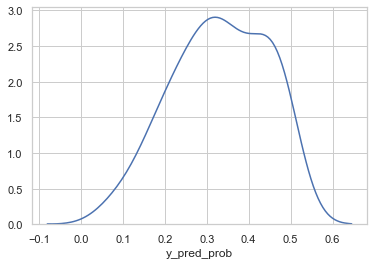

In [290]:
## Prediction probabilty distribution of errors causing low recall
sns.distplot(low_recall.y_pred_prob, hist=False)

In [ ]:
# most of the prediction is between 0.3-0.4 for low recall errors

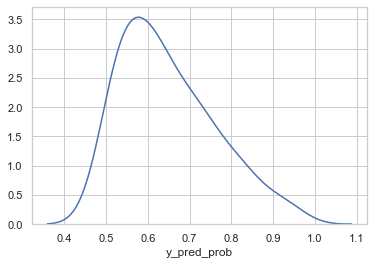

In [291]:
## Prediction probabilty distribution of errors causing low precision
sns.distplot(low_prec.y_pred_prob, hist=False)

In [292]:
# here most of the prob is 0.6 so if we shift the threshold to 0.6 then we may get high precision

In [293]:
# Seeing both the plots we are making lot of errors in 0.4-0.6 regions
# if we just tune the threshold probably we can get better performance

#### Tweaking the threshold of classifier

In [294]:
# Predict on validation set with adjustable decision threshold
threshold = 0.5
probs = model.predict_proba(X_val)[:,1]
val_preds = np.where(probs > threshold, 1, 0)

In [295]:
## Default params : 0.5 threshold
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

array([[737, 105],
       [ 81, 157]], dtype=int64)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       842
           1       0.60      0.66      0.63       238

    accuracy                           0.83      1080
   macro avg       0.75      0.77      0.76      1080
weighted avg       0.83      0.83      0.83      1080



In [300]:
def tweak(threshold):
    ## Tweaking threshold between 0.4 and 0.6
    print("threshold = ", threshold)
    probs = model.predict_proba(X_val)[:,1]
    val_preds = np.where(probs > threshold, 1, 0)
    confusion_matrix(y_val, val_preds)
    print(classification_report(y_val, val_preds))
    print("==========================================")

In [301]:
thresholds = [0.4,0.45,0.5,0.55,0.6]

In [302]:
for th in thresholds:
    tweak(th)

threshold =  0.4
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       842
           1       0.50      0.78      0.61       238

    accuracy                           0.78      1080
   macro avg       0.71      0.78      0.73      1080
weighted avg       0.83      0.78      0.79      1080

threshold =  0.45
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       842
           1       0.57      0.73      0.64       238

    accuracy                           0.82      1080
   macro avg       0.74      0.79      0.76      1080
weighted avg       0.84      0.82      0.83      1080

threshold =  0.5
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       842
           1       0.60      0.66      0.63       238

    accuracy                           0.83      1080
   macro avg       0.75      0.77      0.76      1080
weighted avg       0.8

In [303]:
# taking threshold as 0.45 gives the better result as compared to 0.5
# precision not decreased much and recall and f1-score is increased 
# we can change the threshold only when we are very sure that data distribution won't change much, 0.5 is safe if we r not sure

#### Checking whether there's too much dependence on certain features

We'll compare a few important features : NumOfProducts, IsActiveMember, Age, Balance

In [238]:
df_ea.NumOfProducts.value_counts(normalize=True).sort_index()
low_recall.NumOfProducts.value_counts(normalize=True).sort_index()
low_prec.NumOfProducts.value_counts(normalize=True).sort_index()

1    0.506481
2    0.467593
3    0.020370
4    0.005556
Name: NumOfProducts, dtype: float64

1    0.714286
2    0.285714
Name: NumOfProducts, dtype: float64

1    0.816667
2    0.116667
3    0.066667
Name: NumOfProducts, dtype: float64

### when the num of products is 1 our model is making more error in both prec and recall errors

In [239]:
df_ea.IsActiveMember.value_counts(normalize=True).sort_index()
low_recall.IsActiveMember.value_counts(normalize=True).sort_index()
low_prec.IsActiveMember.value_counts(normalize=True).sort_index()

0    0.481481
1    0.518519
Name: IsActiveMember, dtype: float64

0    0.561905
1    0.438095
Name: IsActiveMember, dtype: float64

0    0.666667
1    0.333333
Name: IsActiveMember, dtype: float64

### Train final, best model ; Save model and its parameters

In [324]:
# keep the model simple so that it is more interpretable

In [304]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report
import joblib

In [305]:
## Re-defining X_train and X_val to consider original unscaled continuous features. y_train and y_val remain unaffected
X_train = df_train.drop(columns = ['Exited'], axis = 1)
X_val = df_val.drop(columns = ['Exited'], axis = 1)

X_train.shape, y_train.shape
X_val.shape, y_val.shape

((7920, 11), (7920,))

((1080, 11), (1080,))

In [306]:
best_f1_lgb = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 3.0}, min_child_samples = 20
                     , importance_type = 'gain', max_depth = 6, num_leaves = 15, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 201, reg_alpha = 0, reg_lambda = 0.1)

In [307]:
model = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', best_f1_lgb)
                         ])

In [308]:
## Fitting final model on train dataset
model.fit(X_train, y_train)

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=['Surname', 'Geography', 'Gender'],
                                    lcols=['Gender'], ohecols=['Geography'],
                                    tcols=['Surname'])),
                ('add_new_features', AddFeatures()),
                ('classifier',
                 LGBMClassifier(boosting_type='dart',
                                class_weight={0: 1, 1: 3.0},
                                colsample_bytree=0.6, importance_type='gain',
                                max_depth=6, n_estimators=201, num_leaves=15,
                                reg_alpha=0, reg_lambda=0.1))])

In [309]:
# Predict target probabilities
val_probs = model.predict_proba(X_val)[:,1]

# Predict target values on val data
val_preds = np.where(val_probs > 0.45, 1, 0) # The probability threshold can be tweaked

In [310]:
## Validation metrics
roc_auc_score(y_val, val_preds)
recall_score(y_val, val_preds)
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

0.787755244615661

0.7310924369747899

array([[711, 131],
       [ 64, 174]], dtype=int64)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       842
           1       0.57      0.73      0.64       238

    accuracy                           0.82      1080
   macro avg       0.74      0.79      0.76      1080
weighted avg       0.84      0.82      0.83      1080



In [311]:
## Save model object
joblib.dump(model, 'final_churn_model_v2_f1_0_45.sav')

['final_churn_model_v2_f1_0_45.sav']

### Load saved model and make predictions on unseen/future data

Here, we'll use df_test as the unseen, future data

In [312]:
import joblib

In [314]:
## Load model object
model = joblib.load('final_churn_model_v2_f1_0_45.sav')

In [315]:
X_test = df_test.drop(columns = ['Exited'], axis = 1)
X_test.shape
y_test.shape

(1000, 11)

(1000,)

In [316]:
## Predict target probabilities
test_probs = model.predict_proba(X_test)[:,1]

In [317]:
## Predict target values on test data
test_preds = np.where(test_probs > 0.45, 1, 0) # Flexibility to tweak the probability threshold
#test_preds = model.predict(X_test)

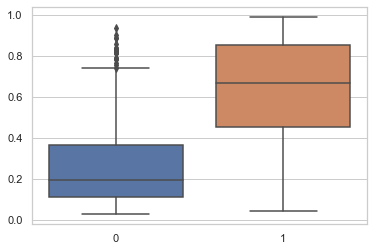

In [318]:
sns.boxplot(y_test.ravel(), test_probs)

In [319]:
## Test set metrics
roc_auc_score(y_test, test_preds)
recall_score(y_test, test_preds)
confusion_matrix(y_test, test_preds)
print(classification_report(y_test, test_preds))

0.7953811505381214

0.7539267015706806

array([[677, 132],
       [ 47, 144]], dtype=int64)

              precision    recall  f1-score   support

           0       0.94      0.84      0.88       809
           1       0.52      0.75      0.62       191

    accuracy                           0.82      1000
   macro avg       0.73      0.80      0.75      1000
weighted avg       0.86      0.82      0.83      1000



In [320]:
## Adding predictions and their probabilities in the original test dataframe
test = df_test.copy()
test['predictions'] = test_preds
test['pred_probabilities'] = test_probs

#### Creating a list of customers who are the most likely to churn

Listing customers who have a churn probability higher than 70%. These are the ones who can be targeted immediately

In [321]:
high_churn_list = test[test.pred_probabilities > 0.7].sort_values(by = ['pred_probabilities'], ascending = False
                                                                 ).reset_index().drop(columns = ['index', 'Exited', 'predictions'], axis = 1)

In [322]:
high_churn_list.shape
high_churn_list.head()

(124, 12)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,pred_probabilities
0,Chibueze,546,Germany,Female,58,3,106458.31,4,1,0,128881.87,0.992124
1,Walton,479,Germany,Male,51,1,107714.74,3,1,0,86128.21,0.986451
2,Galgano,665,Germany,Female,43,2,116322.27,4,1,0,35640.12,0.979054
3,Christopher,697,France,Female,49,7,195238.29,4,0,1,131083.56,0.973815
4,Dumetolisa,628,France,Female,46,1,46870.43,4,1,0,31272.14,0.973557


In [323]:
high_churn_list.to_csv('high_churn_list_new.csv', index = False)

#### Feature-based user segments from the above list
Based on business requirements, a prioritization matrix can be defined, wherein certain segments of customers are targeted first. These segments can be defined based on insights through data or the business teams' requirements.
E.g. Males who are an ActiveMember, have a CreditCard and are from Germany can be prioritized first because the business potentially sees the max. ROI from them 